In [1]:
# Importing Standard Libraries

# Library for seeting up the os
import os

# Library for numerical computation
import numpy as np

# Library for Data Analysis and Pre-Processing
import pandas as pd

# Library for Visualizing and Exploration of the Data Insights
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
# from matplotlib.pylab import rcParams
# rcParams['figure.figsize'] = (15,6)
get_ipython().run_line_magic('matplotlib', 'inline')


# Library for Statistical Computing and Statistical Data Analysis
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency

# Library for Regular Expressions
import re
import string

# Library for NLP
import nltk

# Library to avoid warnings
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Setting up the working directory
os.chdir("D:\CSE-FILES-VIDS\MONTAIGNE\TimeSeries")

#Checking the current working directory
os.getcwd()

'D:\\CSE-FILES-VIDS\\MONTAIGNE\\TimeSeries'

In [3]:
# Loading the OrganicSense dataset which is in '.CSV' format i.e; (Comma-Seperated-Values) 
Organic_Sense_raw = pd.read_csv('report_seo_os_from_12-4-2019_to_12-4-2019.csv')

# making an instance of another copy of original data
OrganicSense_KR = Organic_Sense_raw.copy()


In [4]:
# Checking the values in rows and columns for OrganicSense_KR the dataset
OrganicSense_KR

Keywords  Position  Change  \
0                                   open minds       101       0   
1                               open hyderabad        46      -3   
2   list of international schools in hyderabad        48      53   
3                          schools in kondapur        59      42   
4                      schools near gachibowli        24      24   
5                    good schools in hyderabad        37       3   
6           international schools in hyderabad        24       2   
7                    best schools in hyderabad        24       2   
8      best international schools in hyderabad        18       1   
9               best cbse schools in hyderabad        35       1   
10       best international schools in chennai       101       0   
11                   icse schools in hyderabad       101       0   
12                        international school       101       0   
13                     hyderabad public school       101       0   
14              best icse schools in hyderabad       101       0   
15                     schools in secunderabad       101       0   
16                       schools in kukatpally       101       0   
17                        icse schools near me       101       0   
18                    schools near my location       101       0   
19     best international schools in bangalore       101       0   
20                         ib schools in india       101       0   
21                     ib schools in hyderabad       101       0   
22               international schools near me       101       0   
23         international schools in vijayawada       101       0   
24      top international schools in bangalore       101       0   
25              bangalore international school       101       0   
26            residential schools in hyderabad       101       0   
27                     ib schools in bangalore       101       0   
28                boarding school in hyderabad       101       0   
29                list of schools in hyderabad       101       0   
30                           cbse board school       101       0   
31                                   ig school       101       0   
32                         schools in kompally       101       0   
33       top 10 international schools in india       101       0   
34                  india international school       101       0   
35              international boarding schools       101       0   
36                    school websites in india       101       0   
37                       schools in bachupally       101       0   
38                       schools in gachibowli       101       0   
39                            best cbse school       101       0   
40                        schools in manikonda       101       0   
41                    schools in jubilee hills       101       0   
42            top 10 schools in hyderabad 2018       101       0   
43                        best schools near me       101       0   
44               international school shaikpet       101       0   
45   top 10 international schools in hyderabad        22      -1   
46                   best cbse schools near me        41      -3   
47                   cbse schools in hyderabad        51      -4   
48                    top schools in hyderabad        27      -4   
49                 top 10 schools in hyderabad        55      -5   
50                        schools in hyderabad        49      -6   
51               top cbse schools in hyderabad        48      -8   
52                        cbse schools near me       101     -20   

                                                  URL  
0                domain not found in the top 10 pages  
1   www.openminds-hyderabad.com/&sa=U&ved=0ahUKEwj...  
2   www.openminds-hyderabad.com/&sa=U&ved=0ahUKEwj...  
3   www.openminds-hyderabad.com/&sa=U&ved=0ahUKEwi...  
4   www.openminds-hyderabad.com/&sa=U&ved=0ahUKEwj...  
5   www.openminds-hyderabad.c

In [5]:
# Checking the dimesnions of the OrganicSense_KR dataset
OrganicSense_KR.shape

(53, 4)

In [6]:
# Checking the information and datatypes of the OrganicSense_KR dataset
OrganicSense_KR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 4 columns):
Keywords    53 non-null object
Position    53 non-null int64
Change      53 non-null int64
URL         53 non-null object
dtypes: int64(2), object(2)
memory usage: 1.8+ KB


In [7]:
# Loading the OrganicSense dataset which is in '.CSV' format i.e; (Comma-Seperated-Values) and loading the todays data
Organic_Sense_raw = pd.read_csv('report_seo_os_competitors_on_12-4-2019.csv')

# making an instance of another copy of original data
OrganicSense_C = Organic_Sense_raw.copy()


In [8]:
# Checking the values in rows and columns for OrganicSense_KR the dataset
OrganicSense_C

keywords  \
0                               open hyderabad   
1                                   open minds   
2                     school websites in india   
3                      hyderabad public school   
4                top cbse schools in hyderabad   
5                    best schools in hyderabad   
6                international schools near me   
7                        schools in bachupally   
8                    icse schools in hyderabad   
9                    good schools in hyderabad   
10                     ib schools in hyderabad   
11                                   ig school   
12                     schools in secunderabad   
13            residential schools in hyderabad   
14                        international school   
15      top international schools in bangalore   
16                     schools near gachibowli   
17                         schools in kondapur   
18                        schools in manikonda   
19            top 10 schools in hyderabad 2018   
20         international schools in vijayawada   
21                         schools in kompally   
22                     ib schools in bangalore   
23              bangalore international school   
24               international school shaikpet   
25                       schools in gachibowli   
26                        schools in hyderabad   
27                    top schools in hyderabad   
28                           cbse board school   
29              best icse schools in hyderabad   
30     best international schools in bangalore   
31                   cbse schools in hyderabad   
32  list of international schools in hyderabad   
33                            best cbse school   
34              international boarding schools   
35                    schools in jubilee hills   
36                list of schools in hyderabad   
37                boarding school in hyderabad   
38                        cbse schools near me   
39          international schools in hyderabad   
40     best international schools in hyderabad   
41              best cbse schools in hyderabad   
42   top 10 international schools in hyderabad   
43                        best schools near me   
44                  india international school   
45                        icse schools near me   
46       top 10 international schools in india   
47                       schools in kukatpally   
48                 top 10 schools in hyderabad   
49       best international schools in chennai   
50                   best cbse schools near me   
51                         ib schools in india   
52                    schools near my location   

    http://www.openminds-hyderabad.com/  \
0                                    46   
1                                   101   
2                                   101   
3                                   101   
4                                    48   
5                                    24   
6                                   101   
7                                   101   
8                                   101   
9                                    37   
10                                  101   
11                                  101   
12                                  101   
13                                  101   
14                                  101   
15                                  101   
16                                   24   
17                                   59   
18                                  101   
19                                  101   
20                                  101   
21                                  101   
22                                  101   
23                                  101   
24                                  101   
25                                  101   
26                                   49   
27                                   27   
28                                  101   
29                                  101   
30  

In [9]:
# Checking the dimesnions of the OrganicSense_KR dataset
OrganicSense_C.shape

(53, 9)

In [10]:
# Checking the information and datatypes of the OrganicSense_KR dataset
OrganicSense_C.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 9 columns):
keywords                                   53 non-null object
http://www.openminds-hyderabad.com/        53 non-null int64
http://www.meruinternationalschool.com/    53 non-null int64
https://www.drsinternational.com/          53 non-null int64
http://www.oakridge.in/                    53 non-null int64
http://www.openminds-hyderabad.com         53 non-null int64
https://www.kairosgs.com/                  53 non-null int64
https://www.ishyd.org                      53 non-null int64
http://www.gitanjalischools.com            53 non-null int64
dtypes: int64(8), object(1)
memory usage: 3.9+ KB


In [11]:
# Concatenating / Joining both the OrganicSense_Keyword Dataset and OrganicSense_Competitor Dataset
combined_df = pd.concat([OrganicSense_KR, OrganicSense_C], axis = 1)

combined_df.head()

Keywords  Position  Change  \
0                                  open minds       101       0   
1                              open hyderabad        46      -3   
2  list of international schools in hyderabad        48      53   
3                         schools in kondapur        59      42   
4                     schools near gachibowli        24      24   

                                                 URL  \
0               domain not found in the top 10 pages   
1  www.openminds-hyderabad.com/&sa=U&ved=0ahUKEwj...   
2  www.openminds-hyderabad.com/&sa=U&ved=0ahUKEwj...   
3  www.openminds-hyderabad.com/&sa=U&ved=0ahUKEwi...   
4  www.openminds-hyderabad.com/&sa=U&ved=0ahUKEwj...   

                        keywords  http://www.openminds-hyderabad.com/  \
0                 open hyderabad                                   46   
1                     open minds                                  101   
2       school websites in india                                  101   
3        hyderabad public school                                  101   
4  top cbse schools in hyderabad                                   48   

   http://www.meruinternationalschool.com/  https://www.drsinternational.com/  \
0                                      101                                101   
1                                      101                                101   
2                                      101                                101   
3                                      101                                101   
4                                      101                                 30   

   http://www.oakridge.in/  http://www.openminds-hyderabad.com  \
0                      101                                  46   
1                      101                                 101   
2                       12                                 101   
3                      101                                 101   
4                       29                                  48   

   https://www.kairosgs.com/  https://www.ishyd.org  \
0                        101                    101   
1                        101                    101   
2                        101                    101   
3                        101                    101   
4                        101                    101   

   http://www.gitanjalischools.com  
0                              101  
1                              101  
2                              101  
3                              101  
4                               84

In [12]:
# Checking the information and datatypes of the Combined Dataset dataset
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 13 columns):
Keywords                                   53 non-null object
Position                                   53 non-null int64
Change                                     53 non-null int64
URL                                        53 non-null object
keywords                                   53 non-null object
http://www.openminds-hyderabad.com/        53 non-null int64
http://www.meruinternationalschool.com/    53 non-null int64
https://www.drsinternational.com/          53 non-null int64
http://www.oakridge.in/                    53 non-null int64
http://www.openminds-hyderabad.com         53 non-null int64
https://www.kairosgs.com/                  53 non-null int64
https://www.ishyd.org                      53 non-null int64
http://www.gitanjalischools.com            53 non-null int64
dtypes: int64(10), object(3)
memory usage: 5.5+ KB


In [13]:
# changing the object data-types to categorical datatypes
combined_df['Keywords'] = combined_df['Keywords'].astype('category')
combined_df['keywords'] = combined_df['keywords'].astype('category')
combined_df['URL'] = combined_df['URL'].astype('category')

In [14]:
# Checking the datatypes after changing them to actual data-types
combined_df.dtypes

Keywords                                   category
Position                                      int64
Change                                        int64
URL                                        category
keywords                                   category
http://www.openminds-hyderabad.com/           int64
http://www.meruinternationalschool.com/       int64
https://www.drsinternational.com/             int64
http://www.oakridge.in/                       int64
http://www.openminds-hyderabad.com            int64
https://www.kairosgs.com/                     int64
https://www.ishyd.org                         int64
http://www.gitanjalischools.com               int64
dtype: object

In [15]:
# Lets rename the columns of the URL for our Convenience
combined_df = combined_df.rename(columns={'http://www.openminds-hyderabad.com/':'openminds_hyd_1',
                                          'http://www.meruinternationalschool.com/':'merut_international_school',
                                          'https://www.drsinternational.com/':'drs_international',
                                         'http://www.oakridge.in/':'oakridge','http://www.openminds-hyderabad.com':'openminds_hyd_2',
                                         'https://www.kairosgs.com/':'kairosgs','https://www.ishyd.org':'ishyd',
                                         'http://www.gitanjalischools.com':'gitanjali_schools'})

In [16]:
# checking the change column names after assigning them to proper column name
combined_df.columns

Index(['Keywords', 'Position', 'Change', 'URL', 'keywords', 'openminds_hyd_1',
       'merut_international_school', 'drs_international', 'oakridge',
       'openminds_hyd_2', 'kairosgs', 'ishyd', 'gitanjali_schools'],
      dtype='object')

In [17]:
# Lets Seperate numerical and categorical columns for further processing of the data
num_cols = ['Position','Change','openminds_hyd_1','merut_international_school','drs_international','oakridge','openminds_hyd_2','kairosgs',
           'ishyd','gitanjali_schools']
cat_cols = ['Keywords','URL','keywords']

In [18]:
# Lets see the Descriptive Statistics of the combined_df dataset
combined_df.describe()

Position     Change  openminds_hyd_1  merut_international_school  \
count   53.000000  53.000000        53.000000                   53.000000   
mean    81.981132   1.396226        81.981132                   97.283019   
std     30.064348  10.415114        30.064348                    9.757398   
min     18.000000 -20.000000        18.000000                   60.000000   
25%     51.000000   0.000000        51.000000                  101.000000   
50%    101.000000   0.000000       101.000000                  101.000000   
75%    101.000000   0.000000       101.000000                  101.000000   
max    101.000000  53.000000       101.000000                  101.000000   

       drs_international    oakridge  openminds_hyd_2  kairosgs       ishyd  \
count          53.000000   53.000000        53.000000      53.0   53.000000   
mean           72.566038   45.716981        81.981132     101.0   77.849057   
std            33.165384   39.325749        30.064348       0.0   37.725423   
min            11.000000    4.000000        18.000000     101.0    3.000000   
25%            44.000000   11.000000        51.000000     101.0   41.000000   
50%           101.000000   29.000000       101.000000     101.0  101.000000   
75%           101.000000  101.000000       101.000000     101.0  101.000000   
max           101.000000  101.000000       101.000000     101.0  101.000000   

       gitanjali_schools  
count          53.000000  
mean           80.584906  
std            31.013294  
min            15.000000  
25%            64.000000  
50%           101.000000  
75%           101.000000  
max           101.000000

In [19]:
# Lets see the unique count of values in the combined_df data
combined_df.nunique()

Keywords                      53
Position                      14
Change                        14
URL                           17
keywords                      53
openminds_hyd_1               14
merut_international_school     9
drs_international             22
oakridge                      24
openminds_hyd_2               14
kairosgs                       1
ishyd                         14
gitanjali_schools             19
dtype: int64

In [20]:
# Lets see if there are any missing values in the combined_df dataset
combined_df.isnull().sum()

Keywords                      0
Position                      0
Change                        0
URL                           0
keywords                      0
openminds_hyd_1               0
merut_international_school    0
drs_international             0
oakridge                      0
openminds_hyd_2               0
kairosgs                      0
ishyd                         0
gitanjali_schools             0
dtype: int64

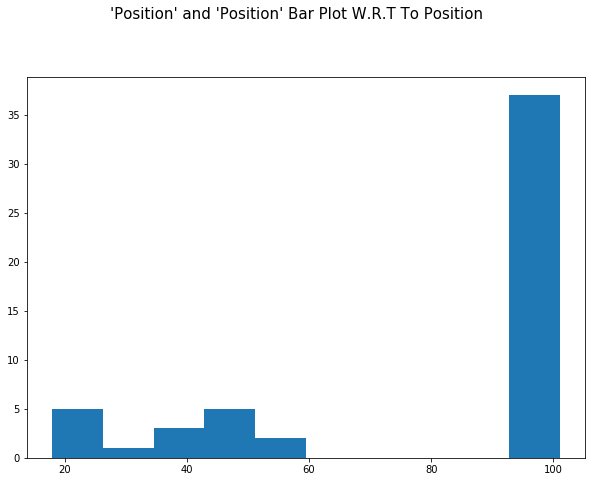

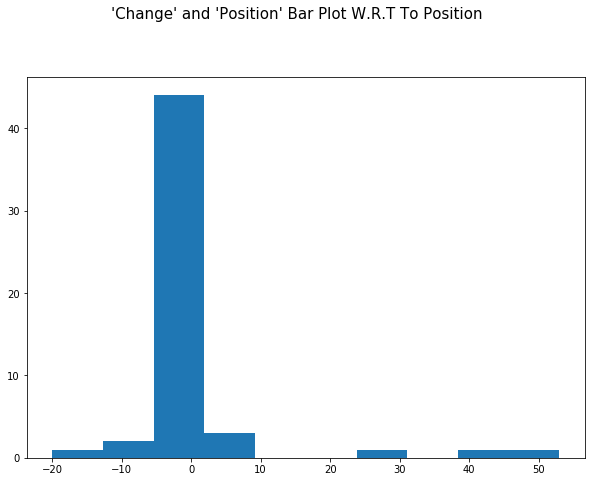

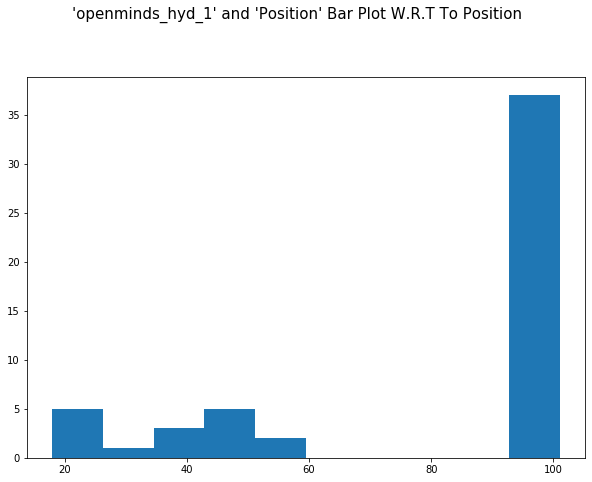

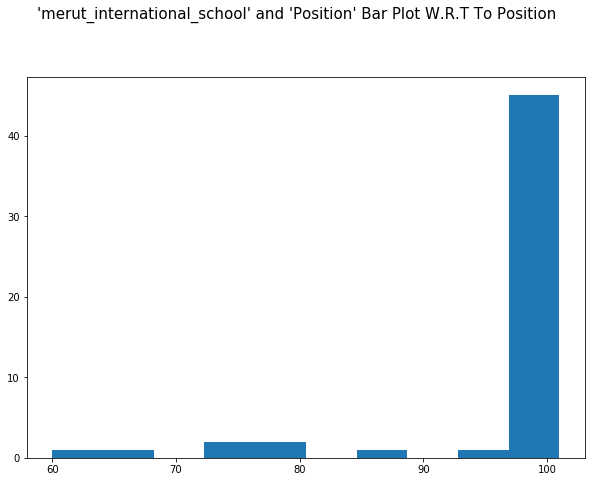

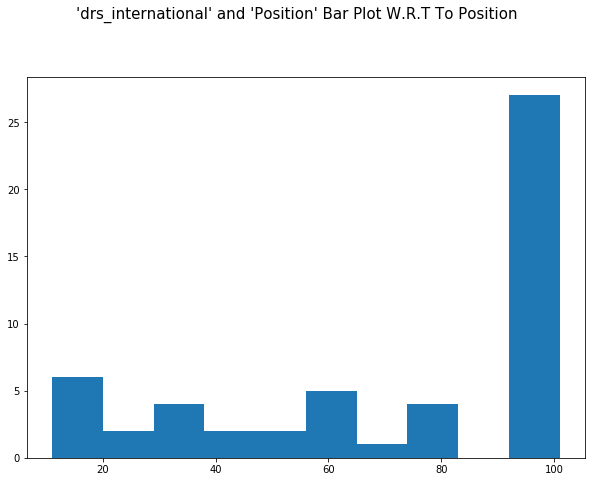

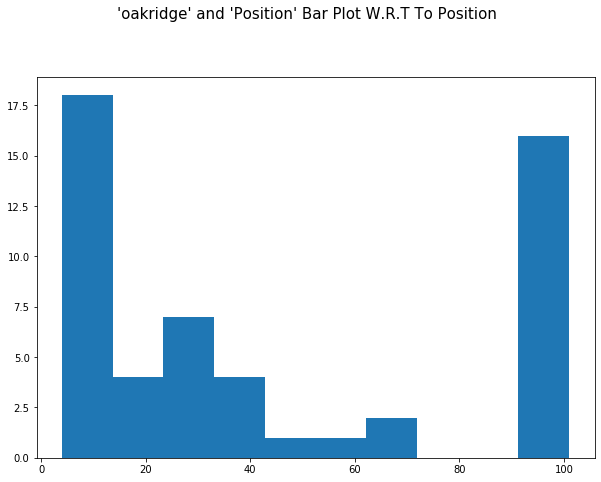

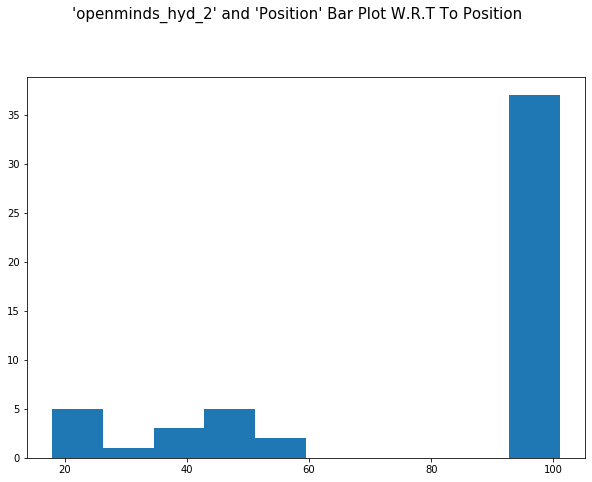

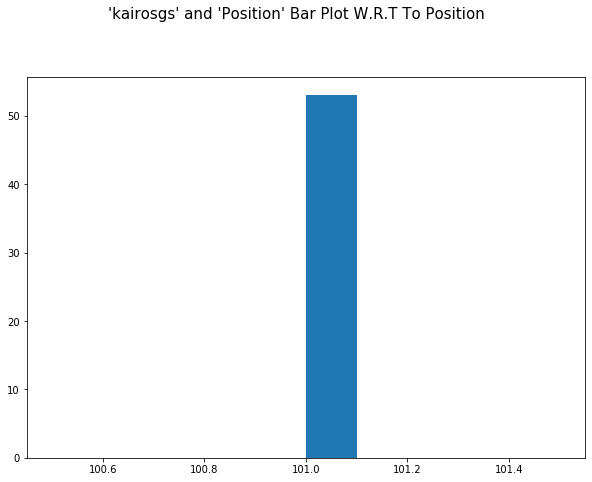

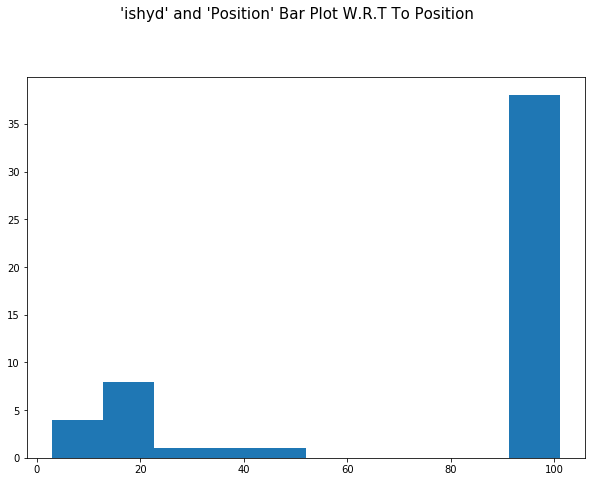

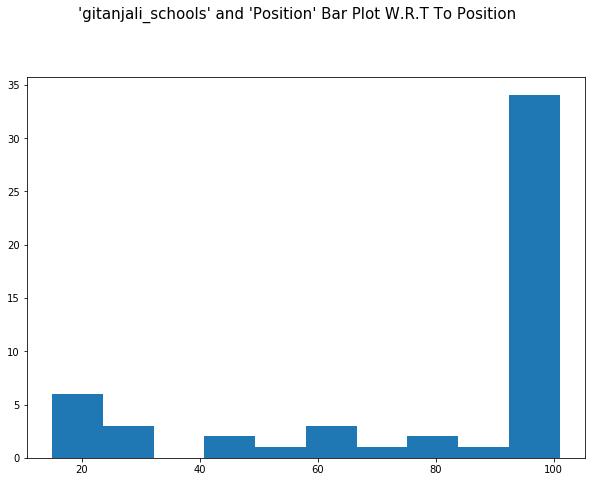

In [21]:
# Lets Visualize the Histogram Distriubution of the Position column
for i in num_cols:
    fig = plt.figure(figsize=(10,7))
    plt.hist(x=i, data=combined_df)
    plt.suptitle("'{X}' and '{Y}' Bar Plot W.R.T To Position".format(X=i,Y='Position'),y = 1.02,fontsize=15)
    #fig.savefig("{X}_and_{Y}_Scatter_Plot.png".format(X=i,Y='cnt'))
    plt.show()

In [22]:
# Lets See The Bar Plot Visualization 
# Bar Plot For Bivariate analysis
def BV_Barplot(x,y,combined_df):
    ss = combined_df.groupby([x]).sum().transpose()
    ss = round(ss)
    ax = ss.loc[y].plot(kind='bar', figsize=(15,7))
    for i in ax.patches:
        ax.annotate(str(round(i.get_height())), (i.get_x()+.1, i.get_height()/1.5),fontsize=14)
        #ax.text(i.get_x()/1.5, i.get_height()/1.5,str(round((i.get_height()))), fontsize=14)
    plt.xlabel(x,fontsize= 15)
    plt.ylabel(y,fontsize= 15)
    plt.xticks(fontsize=12,rotation = 90)
    plt.yticks(fontsize=12)
    plt.title("'{X}' wise sum of total '{Y}'".format(X=x,Y=y),fontsize = 17)
    #plt.savefig("{X}_Vs_{Y}.png".format(X=x,Y=y))
    plt.show()

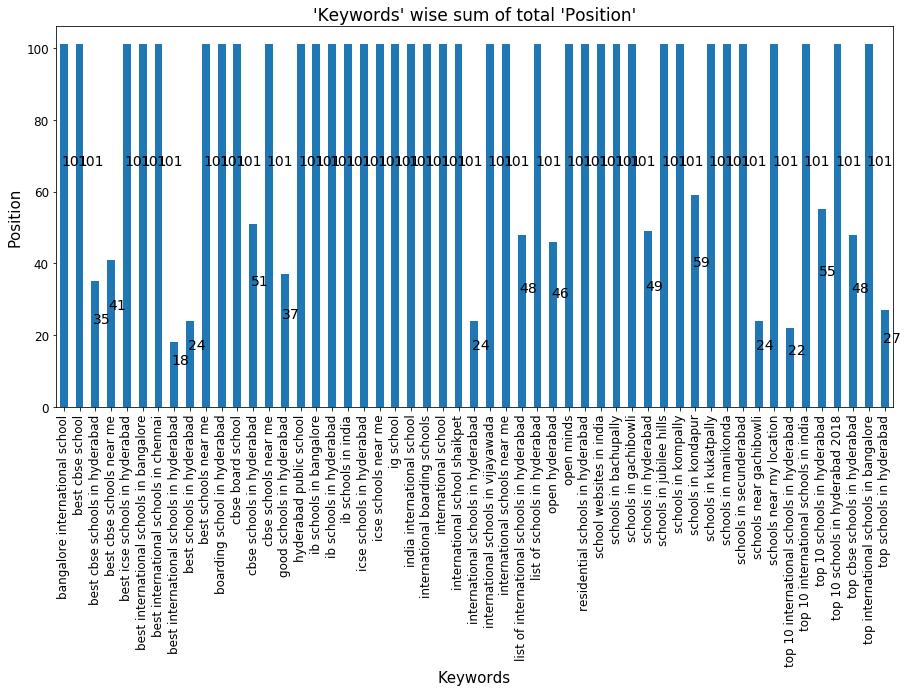

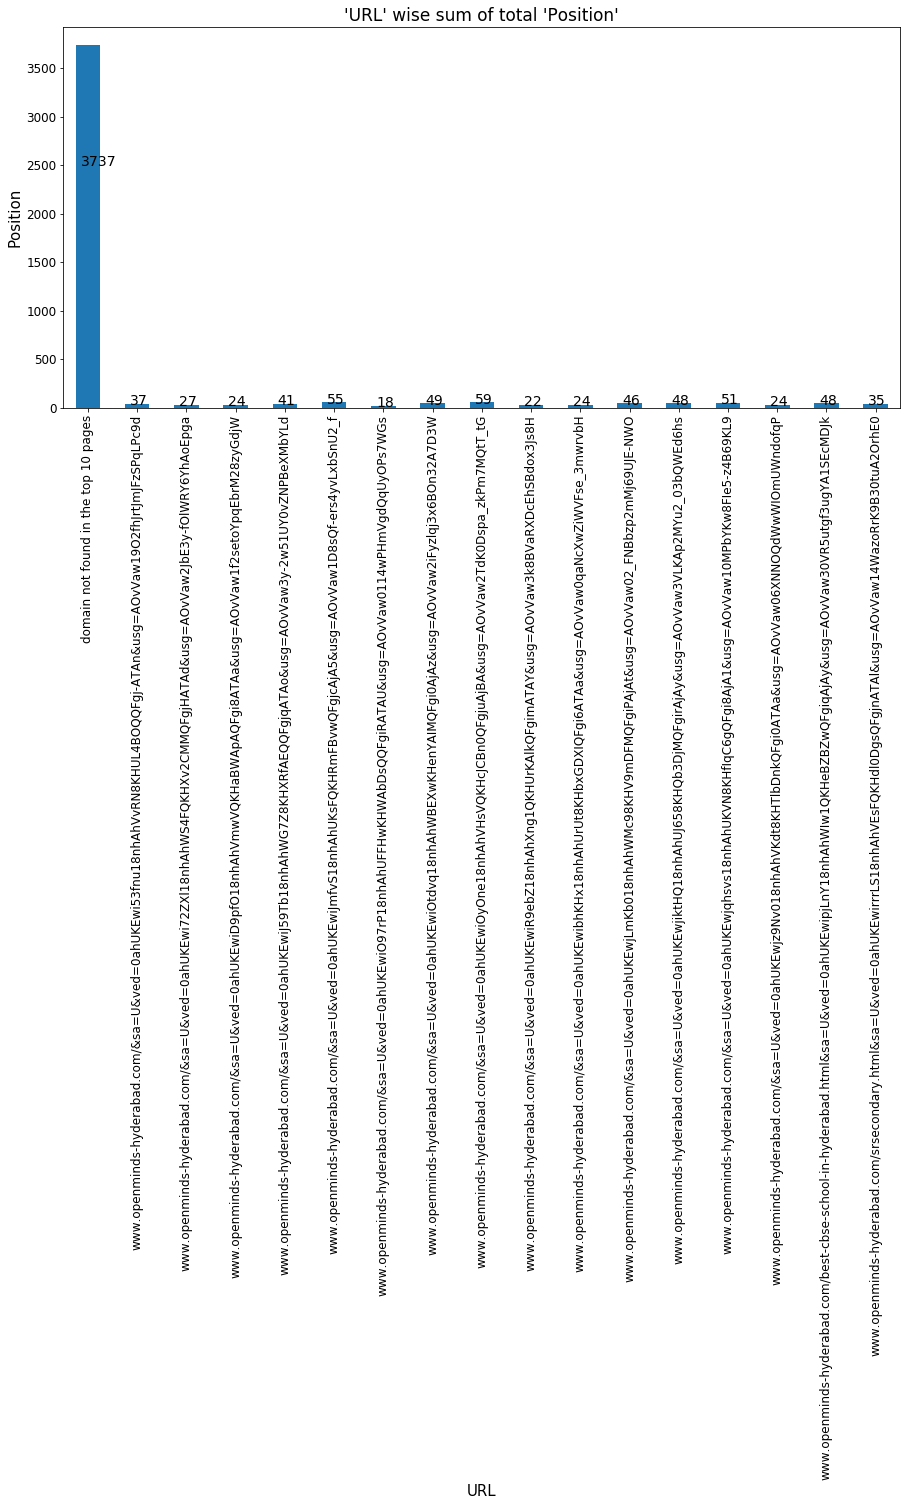

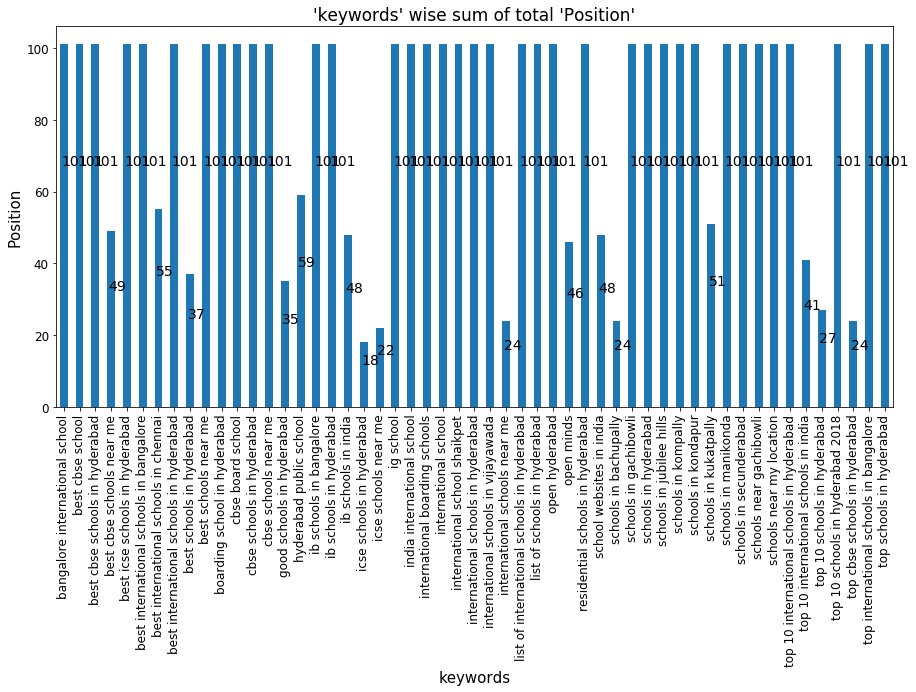

In [23]:
# Lets See The Sum Wise Count of total in Categorical Variables W.R.T their 'Position'
for i in cat_cols:
    BV_Barplot(i, 'Position', combined_df)

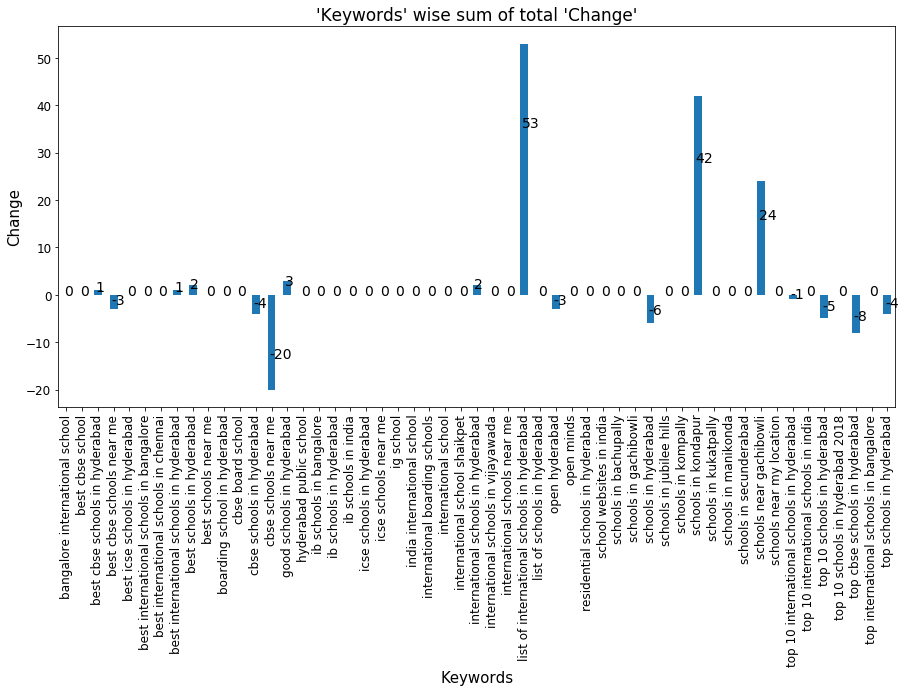

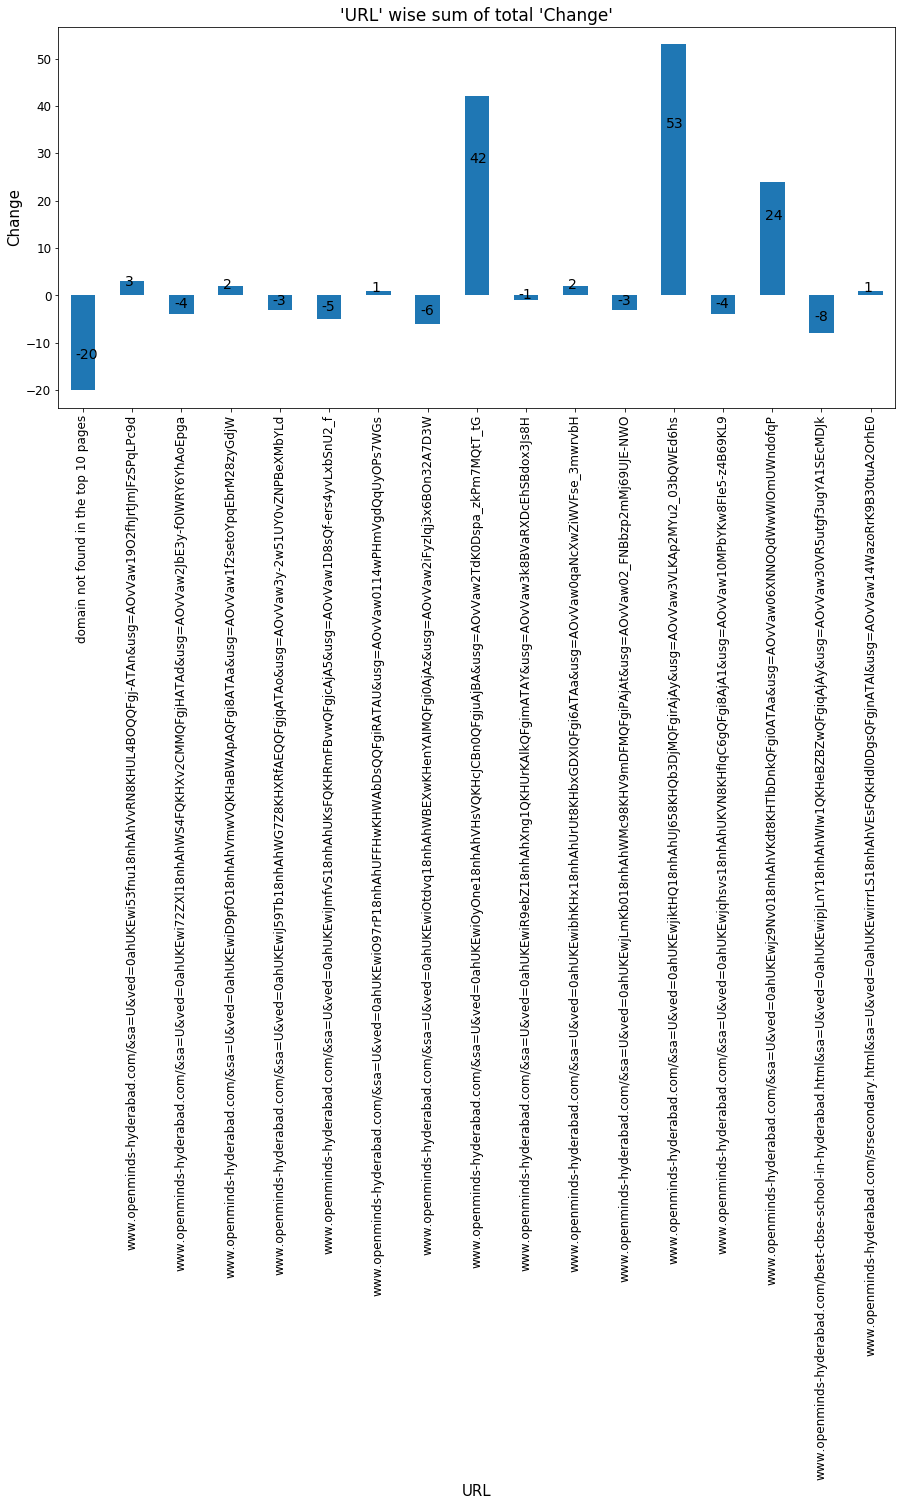

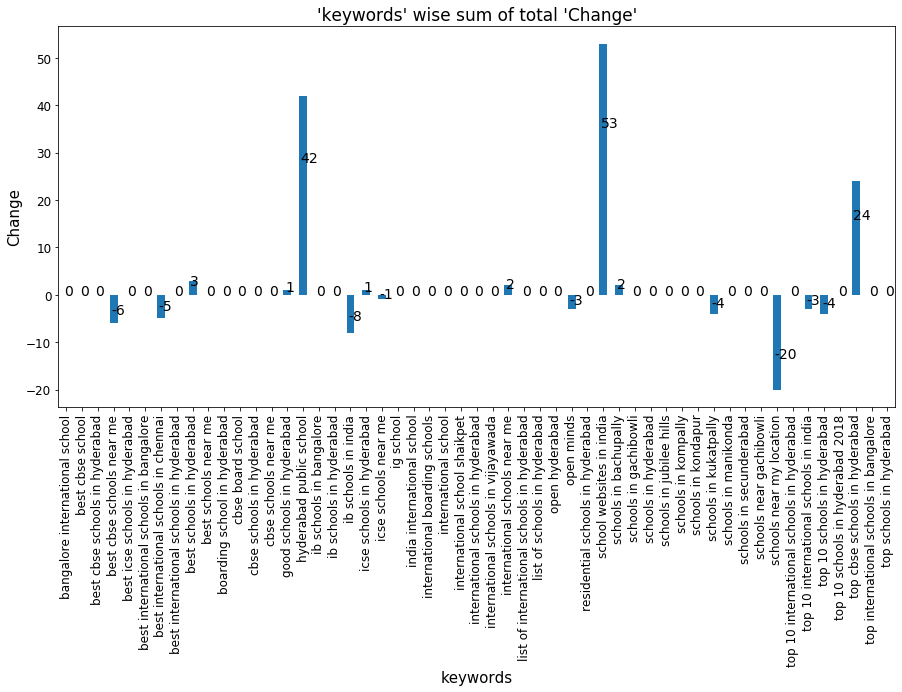

In [24]:
# Lets See The Sum Wise Count of total in Categorical Variables W.R.T their 'Change'
for i in cat_cols:
    BV_Barplot(i, 'Change', combined_df)

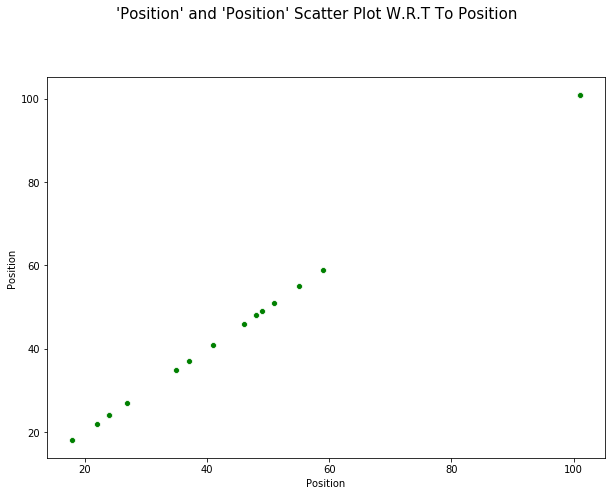

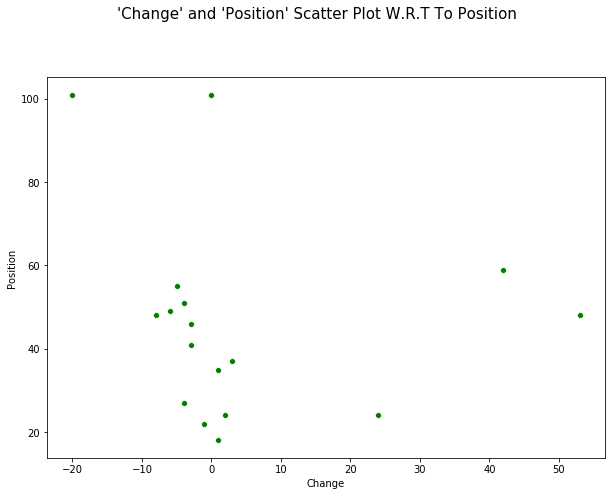

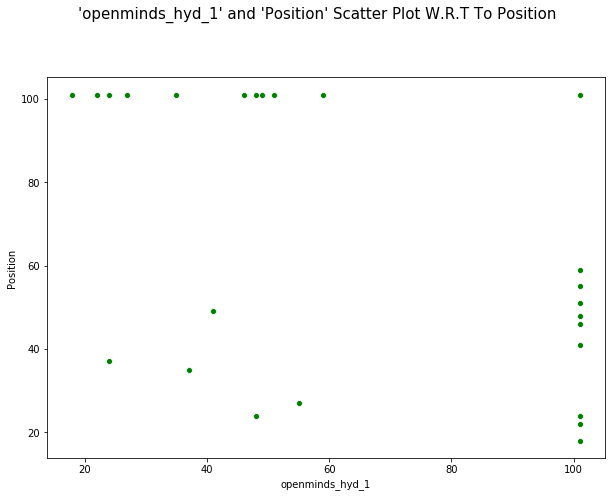

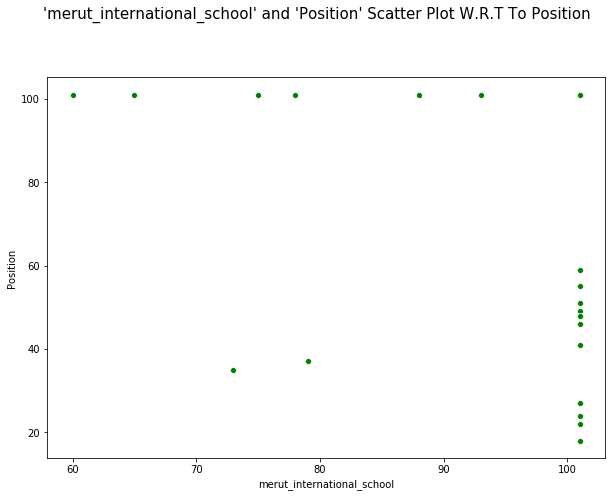

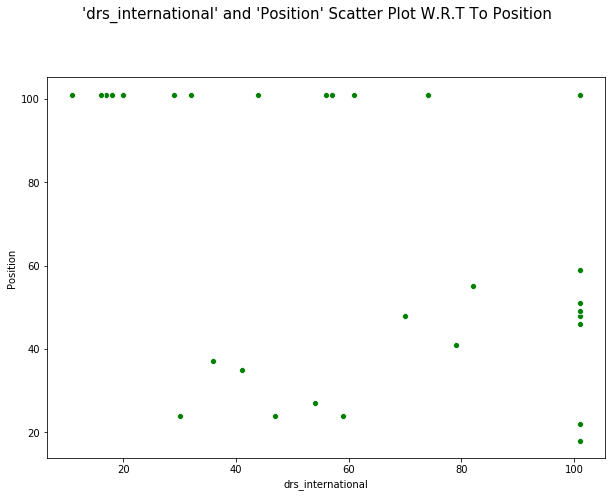

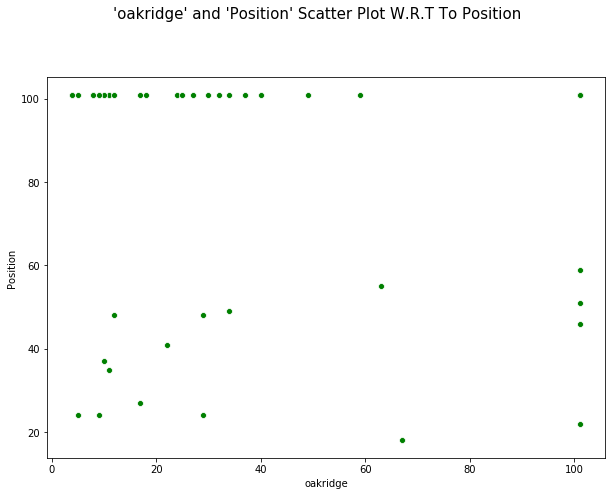

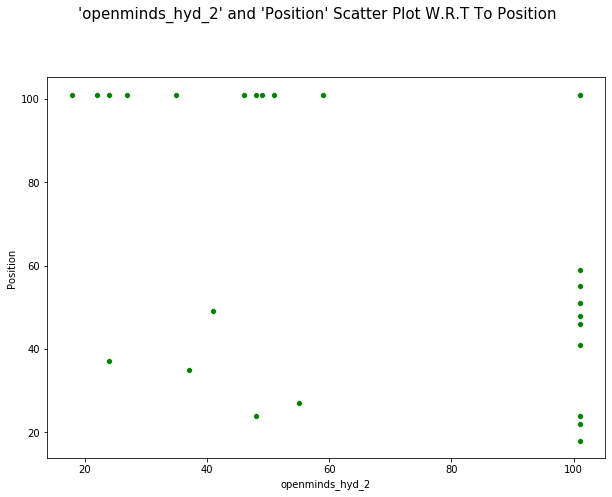

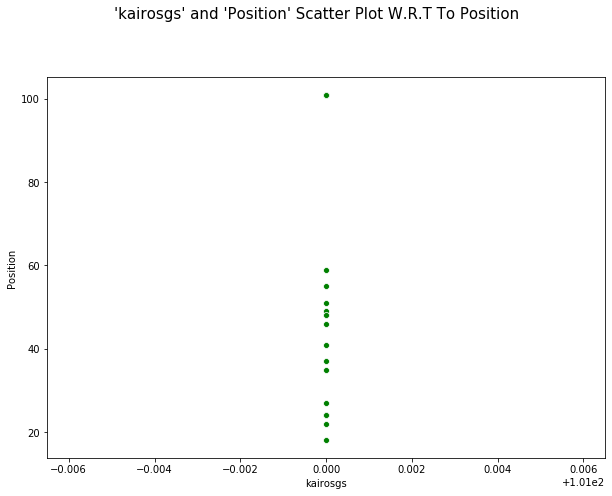

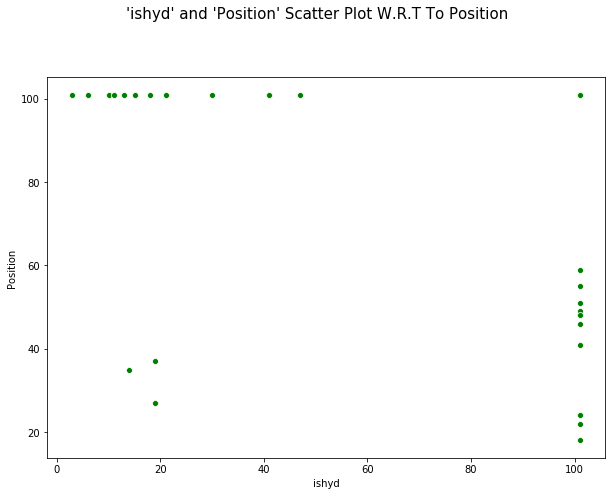

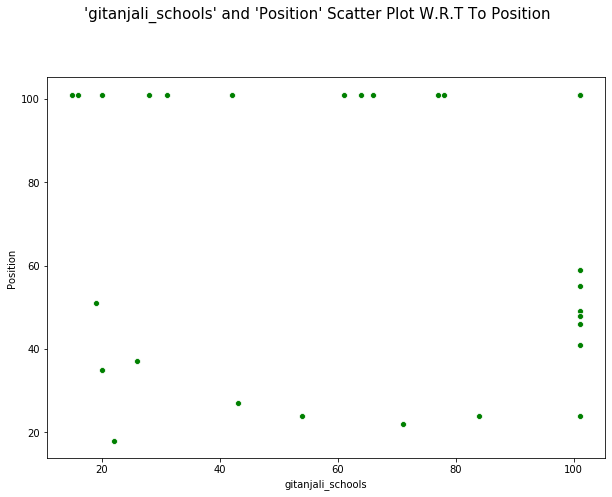

In [25]:
# Joint plot Visualization of all numeric column W.R.T To "Position"
for i in num_cols:
    fig = plt.figure(figsize=(10,7))
    ax = sns.scatterplot(x=i, y="Position", data=combined_df,color='g')
    ax.set(xlabel=i,ylabel='Position')
    plt.suptitle("'{X}' and '{Y}' Scatter Plot W.R.T To Position".format(X=i,Y='Position'),y = 1.02,fontsize=15)
    #fig.savefig("{X}_and_{Y}_Scatter_Plot.png".format(X=i,Y='cnt'))
    plt.show()

In [26]:
# Lets see the correlation on the whole dataset
combined_df.corr()

Position    Change  openminds_hyd_1  \
Position                    1.000000 -0.231944         0.012467   
Change                     -0.231944  1.000000         0.023608   
openminds_hyd_1             0.012467  0.023608         1.000000   
merut_international_school -0.032169  0.034262         0.679438   
drs_international          -0.007087  0.030627         0.478150   
oakridge                    0.058584 -0.065078         0.384561   
openminds_hyd_2             0.012467  0.023608         1.000000   
kairosgs                         NaN       NaN              NaN   
ishyd                      -0.106449  0.083604         0.513291   
gitanjali_schools           0.243678  0.072261         0.244936   

                            merut_international_school  drs_international  \
Position                                     -0.032169          -0.007087   
Change                                        0.034262           0.030627   
openminds_hyd_1                               0.679438           0.478150   
merut_international_school                    1.000000           0.518939   
drs_international                             0.518939           1.000000   
oakridge                                      0.363912           0.511013   
openminds_hyd_2                               0.679438           0.478150   
kairosgs                                           NaN                NaN   
ishyd                                         0.639730           0.593280   
gitanjali_schools                             0.296030           0.147319   

                            oakridge  openminds_hyd_2  kairosgs     ishyd  \
Position                    0.058584         0.012467       NaN -0.106449   
Change                     -0.065078         0.023608       NaN  0.083604   
openminds_hyd_1             0.384561         1.000000       NaN  0.513291   
merut_international_school  0.363912         0.679438       NaN  0.639730   
drs_international           0.511013         0.478150       NaN  0.593280   
oakridge                    1.000000         0.384561       NaN  0.396659   
openminds_hyd_2             0.384561         1.000000       NaN  0.513291   
kairosgs                         NaN              NaN       NaN       NaN   
ishyd                       0.396659         0.513291       NaN  1.000000   
gitanjali_schools           0.076675         0.244936       NaN  0.427365   

                            gitanjali_schools  
Position                             0.243678  
Change                               0.072261  
openminds_hyd_1                      0.244936  
merut_international_school           0.296030  
drs_international                    0.147319  
oakridge                             0.076675  
openminds_hyd_2                      0.244936  
kairosgs                                  NaN  
ishyd                                0.427365  
gitanjali_schools                    1.000000

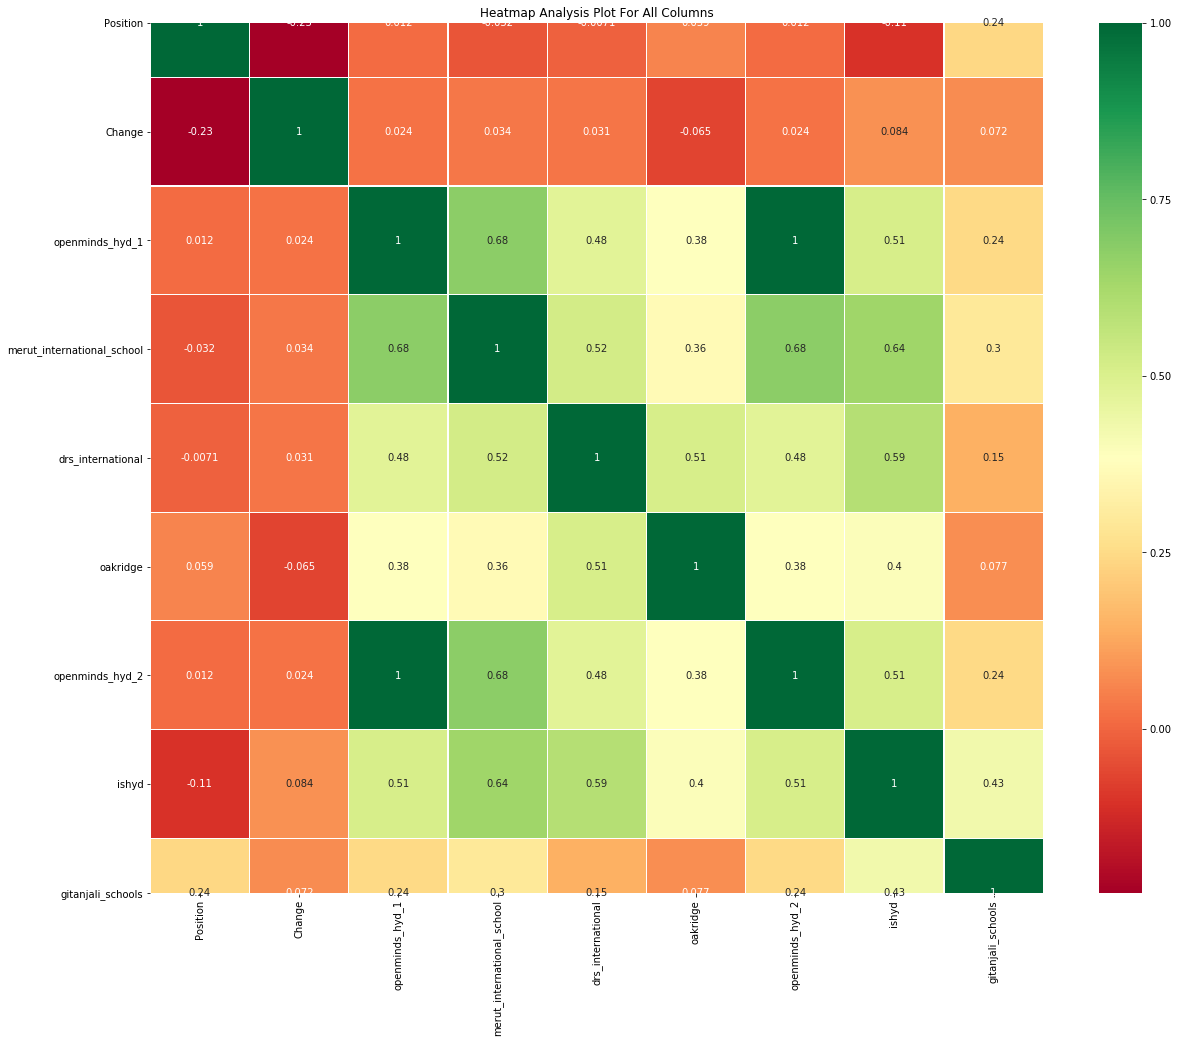

In [27]:
## Again Ploting The heatmap analysis plot using seaborn library
corr = combined_df[['Position','Change','openminds_hyd_1','merut_international_school','drs_international','oakridge','openminds_hyd_2','ishyd','gitanjali_schools']].corr()
sns.heatmap(corr, annot=True, cmap='RdYlGn', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,16)
plt.title("Heatmap Analysis Plot For All Columns")
plt.show()

In [28]:
# Chi2 square test of independence for checking relation between Categorical variables and target variable
# Lets save all categorical column names
cat_cols = ['Keywords','URL','keywords']

print("Chi2-Square Test of Independence")
print("\n*******************************")

# loop for chi2 square test of independence
for i in cat_cols:
    print(i)
    # here Chi2-Square test compares two variables in contigency table
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(combined_df['Position'], combined_df[i]))
    print(p)
    print("-----------------------------")

Chi2-Square Test of Independence

*******************************
Keywords
0.35590903439248056
-----------------------------
URL
7.478138474942675e-53
-----------------------------
keywords
0.35590903439248056
-----------------------------


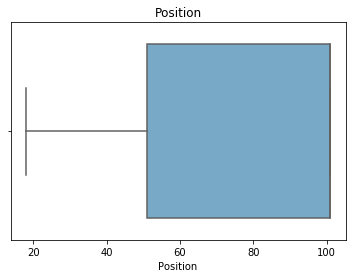

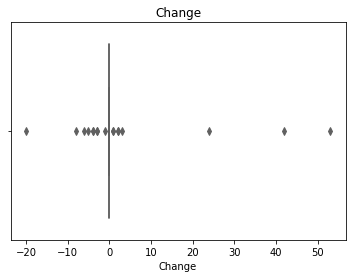

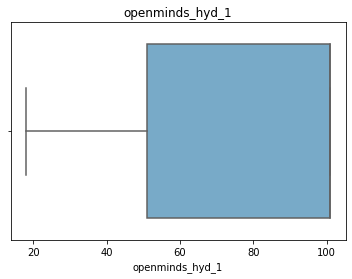

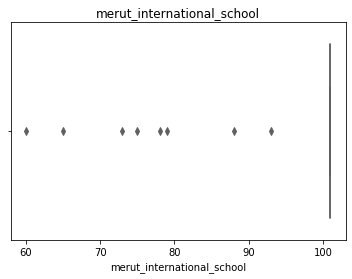

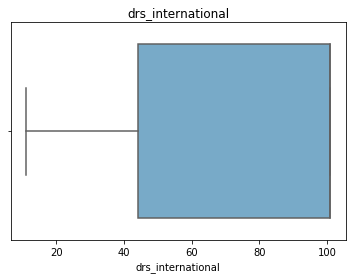

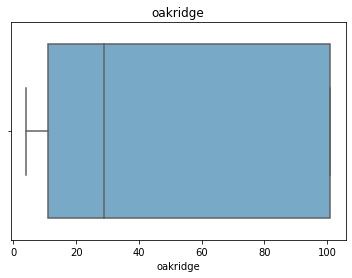

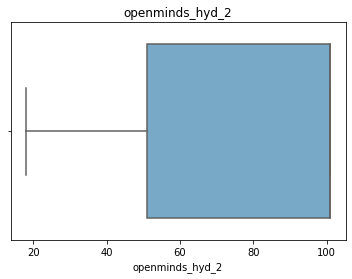

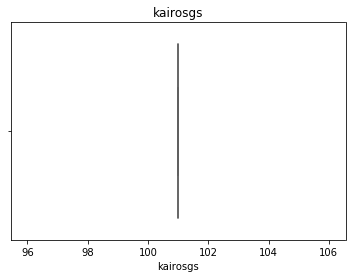

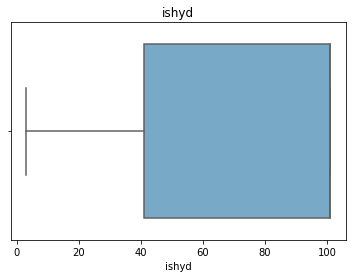

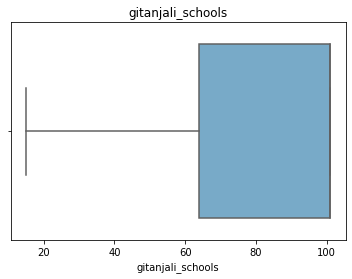

In [29]:
# Lets Check Outlier in Numeric Columns
for i in num_cols:
    plt.figure()
    sns.boxplot(combined_df[i],palette="Blues")
    plt.title(i)
    plt.show()

In [30]:
# Lets detect outliers from data-set 
# Outliers which fall above the upper fence which is 1.5*IQR and below fence 1.5*IQR will be deteted
for i in num_cols:
    print(i)
    q75, q25 = np.percentile(combined_df.loc[:,i], [75, 25])
    
    # iqr-Inter Quartile Range
    iqr = q75 - q25
    min = q25 - (iqr * 1.5)
    max = q75 + (iqr * 1.5)
    
    print(iqr)
    print(min)
    print(max)
    
# Replace the values with np.nan    
#     combined_df = combined_df.drop(combined_df[combined_df.loc[:,i] < min].index)
#     combined_df = combined_df.drop(combined_df[combined_df.loc[:,i] > max].index)

Position
50.0
-24.0
176.0
Change
0.0
0.0
0.0
openminds_hyd_1
50.0
-24.0
176.0
merut_international_school
0.0
101.0
101.0
drs_international
57.0
-41.5
186.5
oakridge
90.0
-124.0
236.0
openminds_hyd_2
50.0
-24.0
176.0
kairosgs
0.0
101.0
101.0
ishyd
60.0
-49.0
191.0
gitanjali_schools
37.0
8.5
156.5


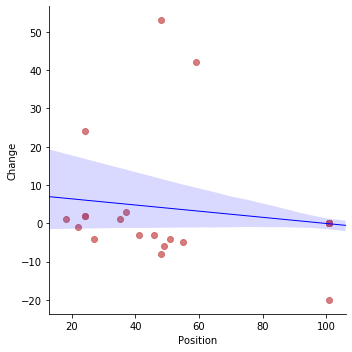

In [31]:
# Lets analyze the linearity between Position & Change 
sns.lmplot(x='Position',y='Change', data=combined_df, 
          scatter_kws={'marker':'o','color':'indianred'},
          line_kws={'linewidth':1,'color':'blue'})

In [32]:
# Let see the dataset once again
combined_df.head()

Keywords  Position  Change  \
0                                  open minds       101       0   
1                              open hyderabad        46      -3   
2  list of international schools in hyderabad        48      53   
3                         schools in kondapur        59      42   
4                     schools near gachibowli        24      24   

                                                 URL  \
0               domain not found in the top 10 pages   
1  www.openminds-hyderabad.com/&sa=U&ved=0ahUKEwj...   
2  www.openminds-hyderabad.com/&sa=U&ved=0ahUKEwj...   
3  www.openminds-hyderabad.com/&sa=U&ved=0ahUKEwi...   
4  www.openminds-hyderabad.com/&sa=U&ved=0ahUKEwj...   

                        keywords  openminds_hyd_1  merut_international_school  \
0                 open hyderabad               46                         101   
1                     open minds              101                         101   
2       school websites in india              101                         101   
3        hyderabad public school              101                         101   
4  top cbse schools in hyderabad               48                         101   

   drs_international  oakridge  openminds_hyd_2  kairosgs  ishyd  \
0                101       101               46       101    101   
1                101       101              101       101    101   
2                101        12              101       101    101   
3                101       101              101       101    101   
4                 30        29               48       101    101   

   gitanjali_schools  
0                101  
1                101  
2                101  
3                101  
4                 84

In [33]:
# Transforming the data
# creating categorical codes and assigning levels to categorical levels
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
combined_df['Keywords'] = encoder.fit_transform(combined_df['Keywords'].astype('str'))
combined_df['URL'] = encoder.fit_transform(combined_df['URL'].astype('str'))
combined_df['keywords'] = encoder.fit_transform(combined_df['keywords'].astype('str'))
print(combined_df.dtypes)
print()
combined_df.head()

Keywords                      int32
Position                      int64
Change                        int64
URL                           int32
keywords                      int32
openminds_hyd_1               int64
merut_international_school    int64
drs_international             int64
oakridge                      int64
openminds_hyd_2               int64
kairosgs                      int64
ishyd                         int64
gitanjali_schools             int64
dtype: object



Keywords  Position  Change  URL  keywords  openminds_hyd_1  \
0        32       101       0    0        31               46   
1        31        46      -3   11        32              101   
2        29        48      53   12        34              101   
3        40        59      42    8        15              101   
4        44        24      24   14        50               48   

   merut_international_school  drs_international  oakridge  openminds_hyd_2  \
0                         101                101       101               46   
1                         101                101       101              101   
2                         101                101        12              101   
3                         101                101       101              101   
4                         101                 30        29               48   

   kairosgs  ishyd  gitanjali_schools  
0       101    101                101  
1       101    101                101  
2       101    101                101  
3       101    101                101  
4       101    101                 84

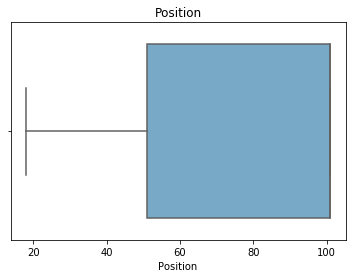

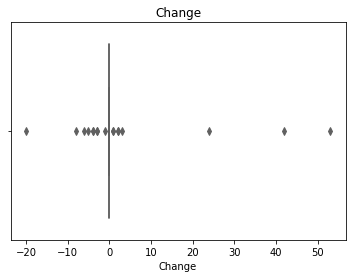

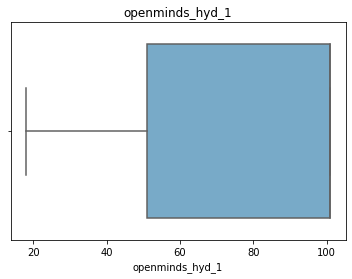

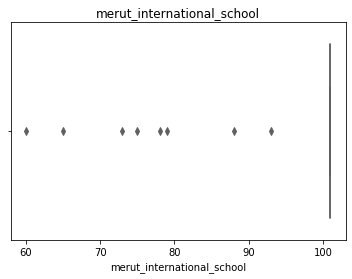

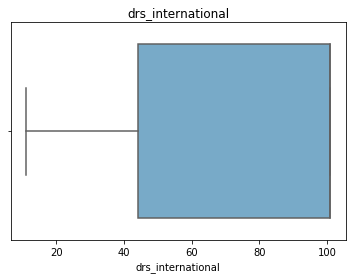

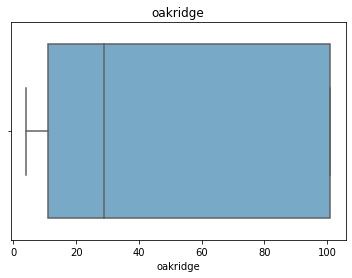

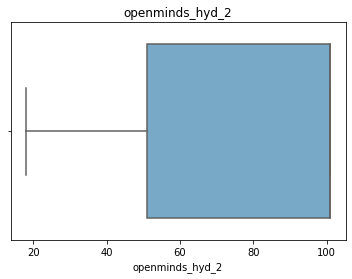

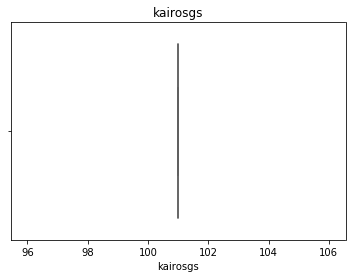

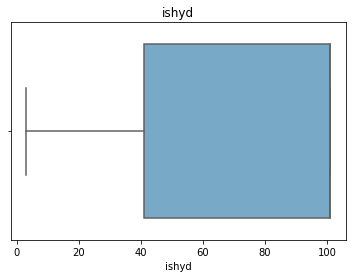

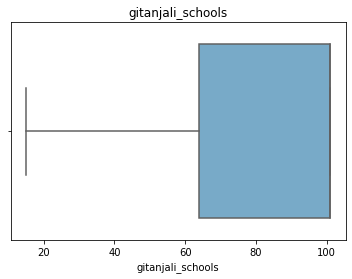

In [34]:
# Lets Again Check Outlier in Numeric Columns After Doing varibales transformation
for i in num_cols:
    plt.figure()
    sns.boxplot(combined_df[i],palette="Blues")
    plt.title(i)
    plt.show()

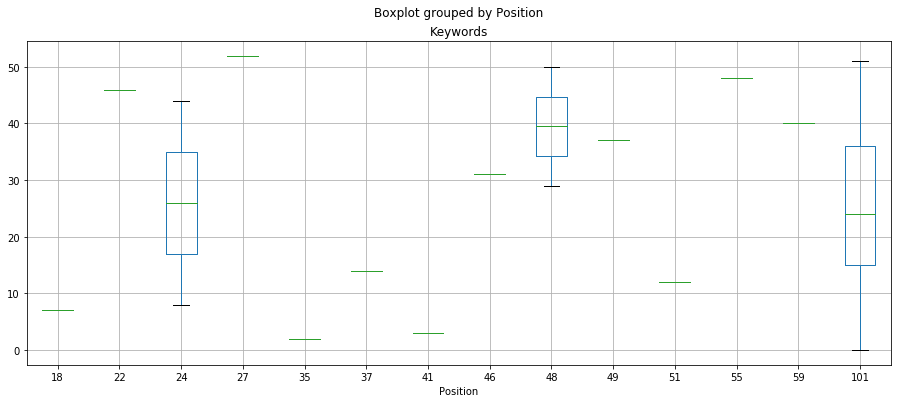

In [35]:
# Lets See Boxplot For 'Keywords' Column W.R.T To their 'Position'
combined_df.boxplot(column='Keywords', by='Position',figsize=(15,6))

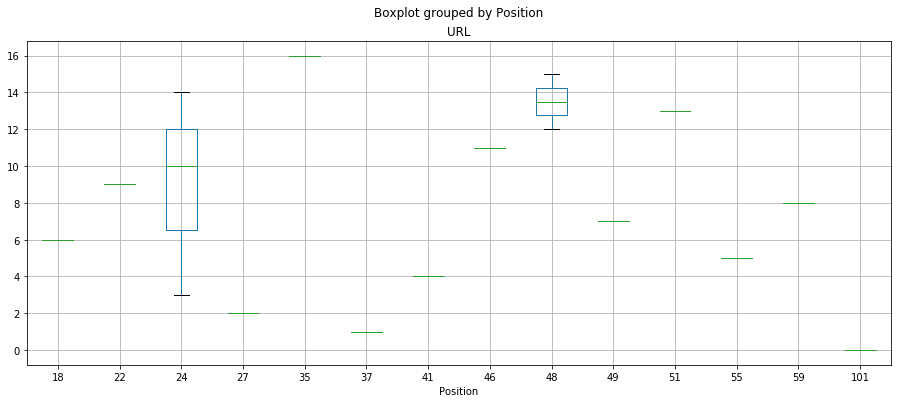

In [36]:
# Lets See Boxplot For 'URL' Column W.R.T To their 'Position'
combined_df.boxplot(column='URL', by='Position',figsize=(15,6))

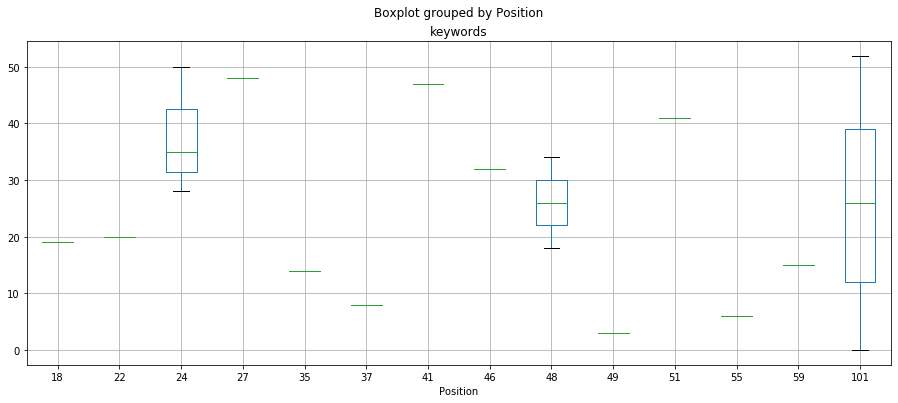

In [37]:
# Lets See Boxplot For 'Competitiors keywords' Column W.R.T To their 'Position'
combined_df.boxplot(column='keywords', by='Position',figsize=(15,6))

Text(0, 0.5, 'Position')

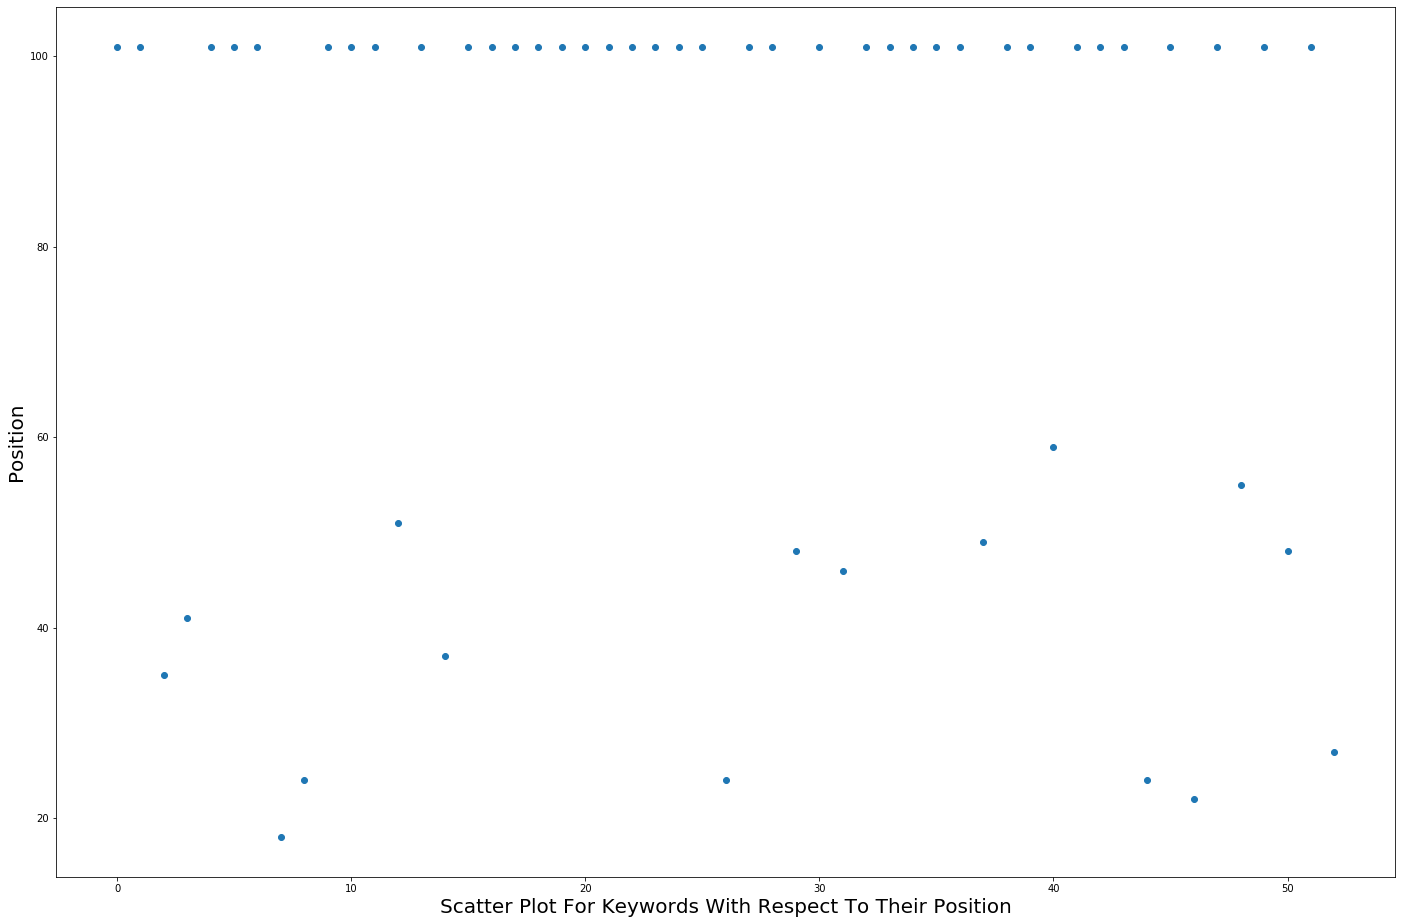

In [38]:
# Lets See the Scatter Plot Visualization for "Organic_Sense_Page_Keywords" W.R.T "Position"
plt.figure(figsize=(24,16))
plt.scatter(combined_df['Keywords'], combined_df['Position'])
plt.xlabel('Scatter Plot For Keywords With Respect To Their Position', fontsize = 20)
plt.ylabel('Position', fontsize =20)

Text(0, 0.5, 'Change')

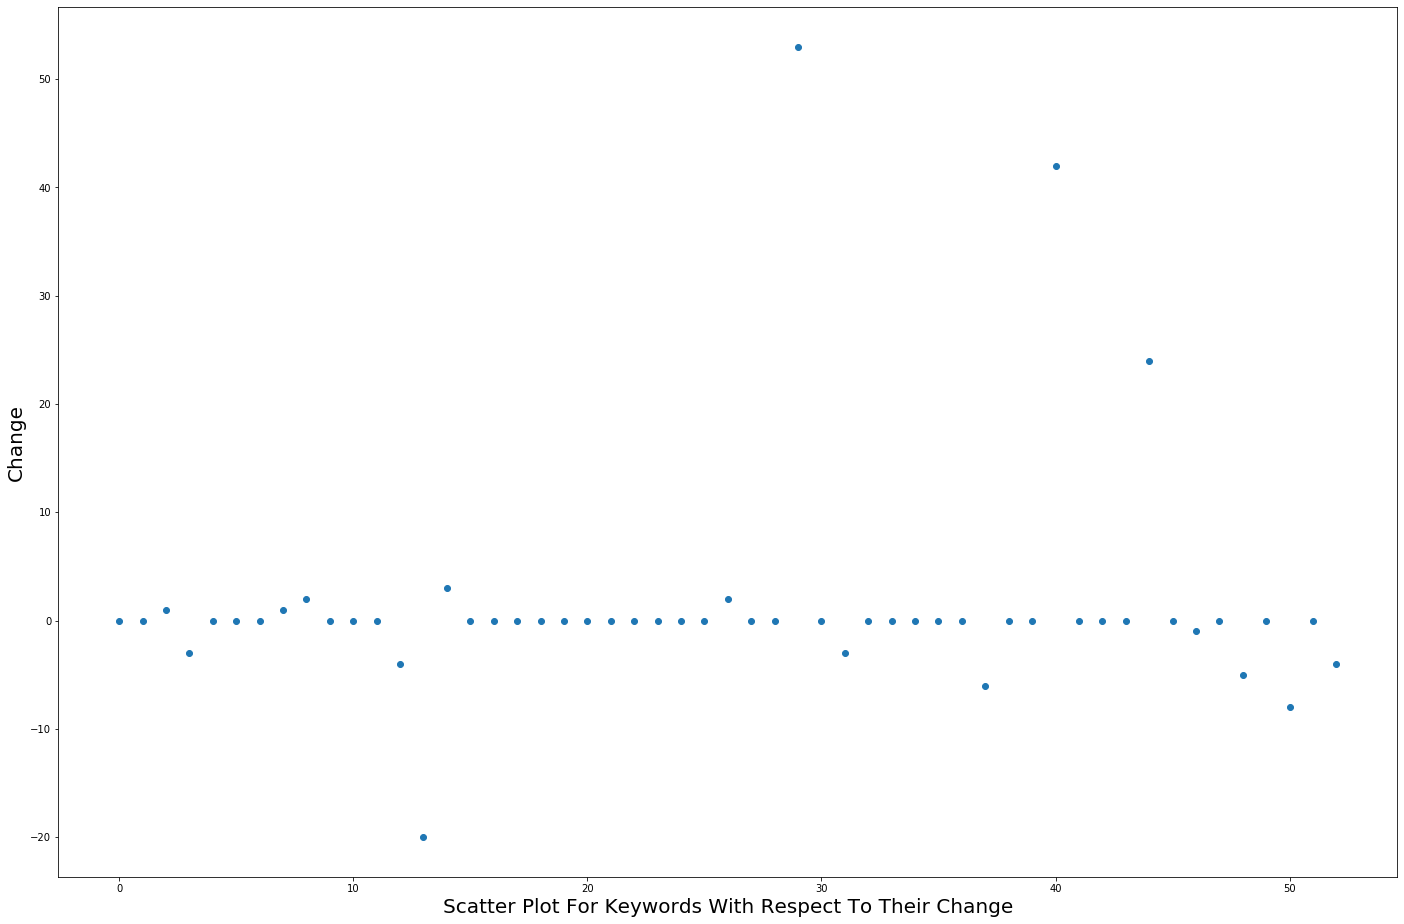

In [39]:
# Lets See the Scatter Plot Visualization for "Organic_Sense_Page_Keywords" W.R.T "Change"
plt.figure(figsize=(24,16))
plt.scatter(combined_df['Keywords'], combined_df['Change'])
plt.xlabel('Scatter Plot For Keywords With Respect To Their Change', fontsize = 20)
plt.ylabel('Change', fontsize =20)

<Figure size 1080x432 with 0 Axes>

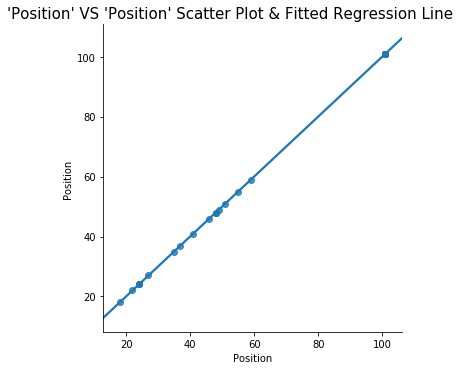

<Figure size 1080x432 with 0 Axes>

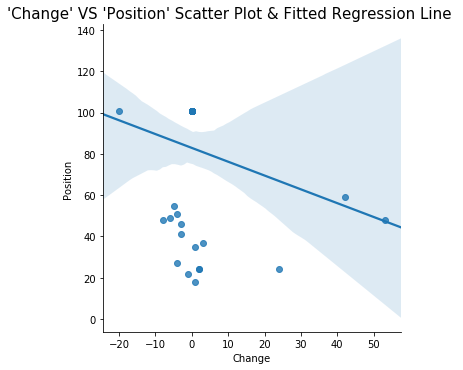

<Figure size 1080x432 with 0 Axes>

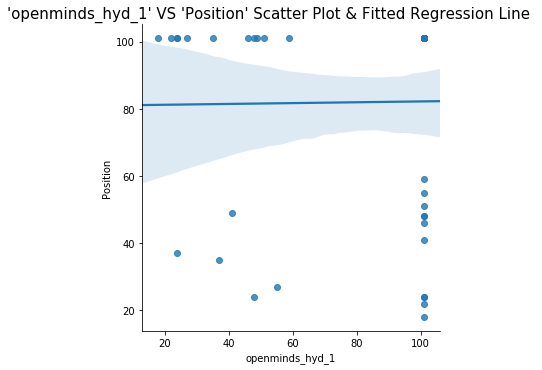

<Figure size 1080x432 with 0 Axes>

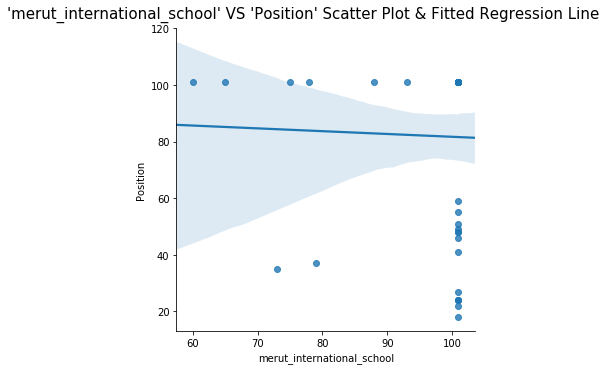

<Figure size 1080x432 with 0 Axes>

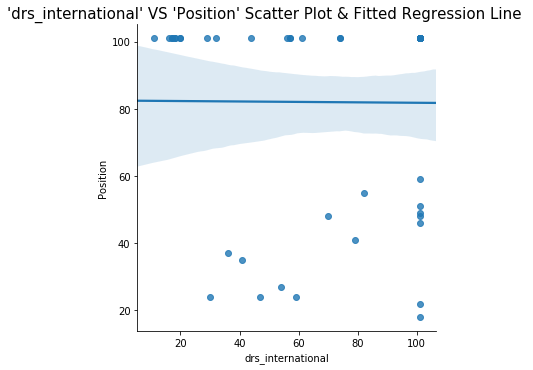

<Figure size 1080x432 with 0 Axes>

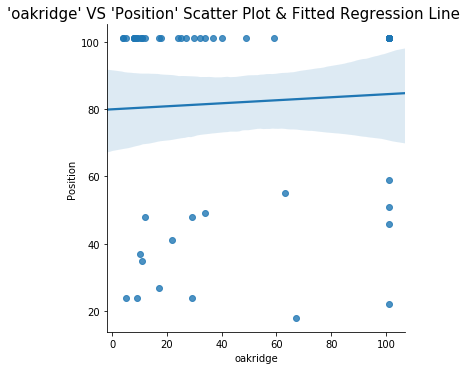

<Figure size 1080x432 with 0 Axes>

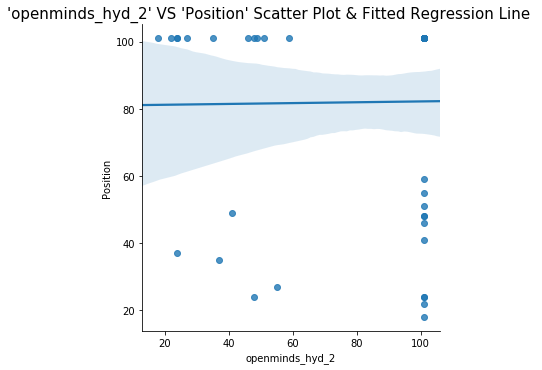

<Figure size 1080x432 with 0 Axes>

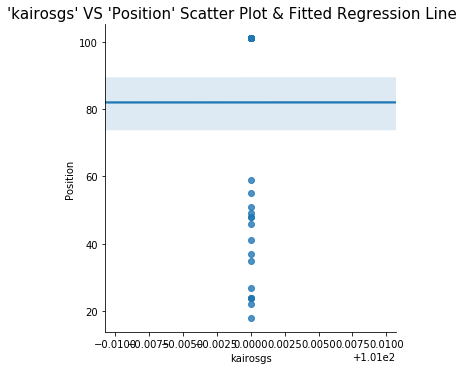

<Figure size 1080x432 with 0 Axes>

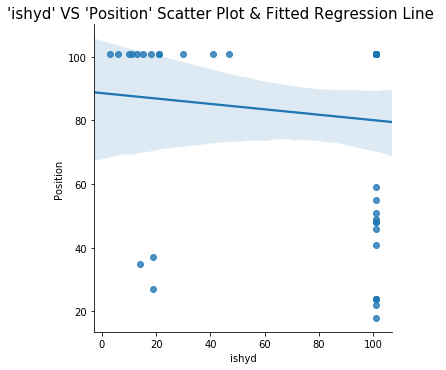

<Figure size 1080x432 with 0 Axes>

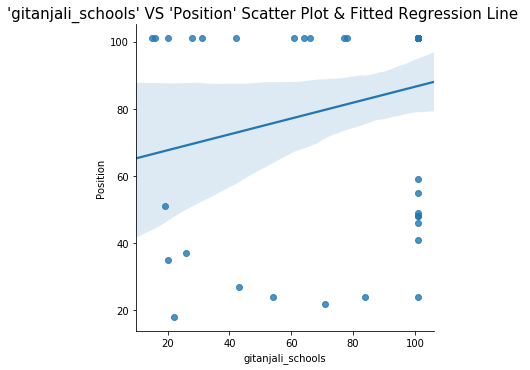

In [40]:
# Lets See the Scatter and Fitter Regression Line Plot Visualization for all the Numerical Columns W.R.T To "Position"
for i in num_cols:
    fig = plt.figure(figsize=(15,6))
    fig = sns.lmplot(x=i, y="Position", data=combined_df)
    fig.set(xlabel=i, ylabel='Position')
    plt.suptitle("'{X}' VS '{Y}' Scatter Plot & Fitted Regression Line ".format(X=i,Y='Position'),y = 1.02,fontsize=15)
    plt.tight_layout()
    plt.show()

<Figure size 1080x432 with 0 Axes>

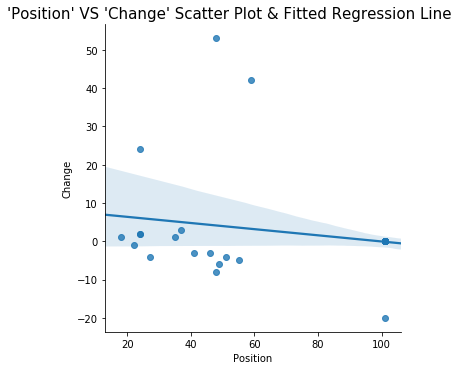

<Figure size 1080x432 with 0 Axes>

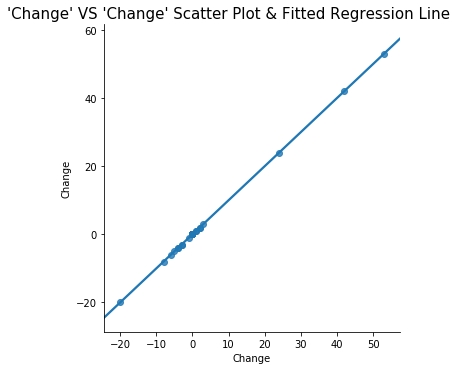

<Figure size 1080x432 with 0 Axes>

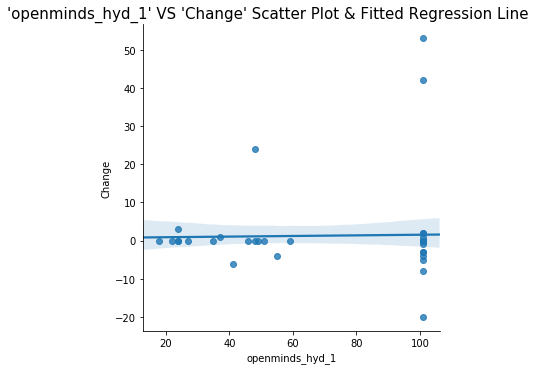

<Figure size 1080x432 with 0 Axes>

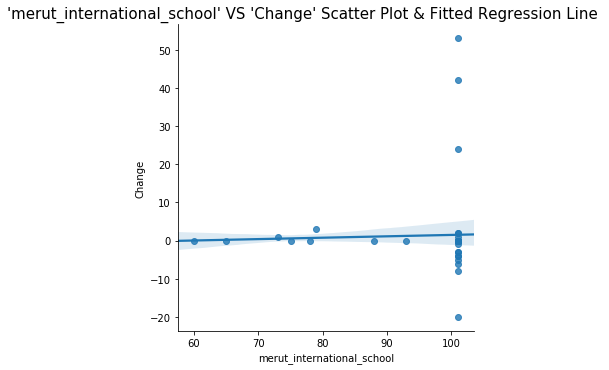

<Figure size 1080x432 with 0 Axes>

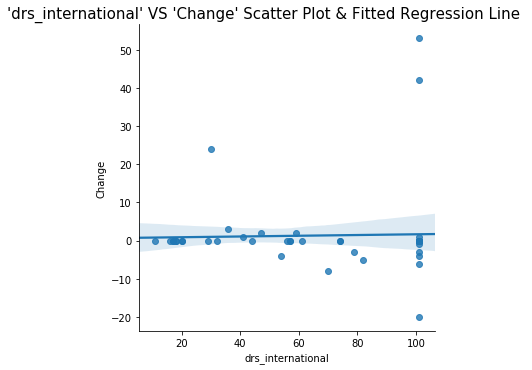

<Figure size 1080x432 with 0 Axes>

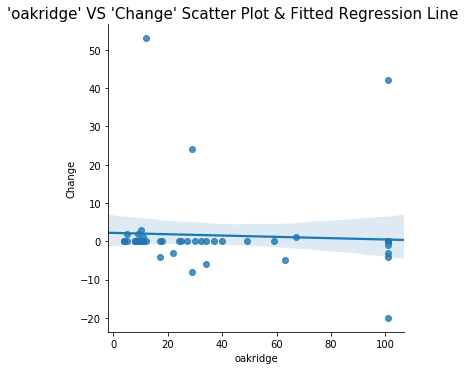

<Figure size 1080x432 with 0 Axes>

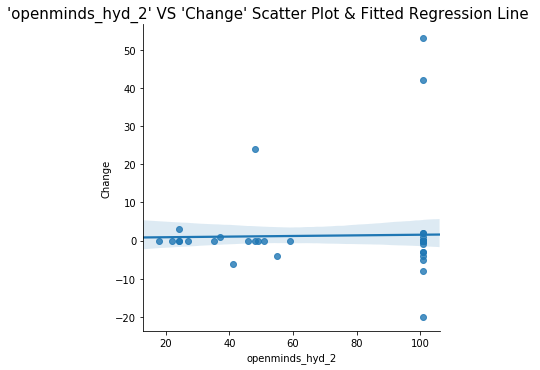

<Figure size 1080x432 with 0 Axes>

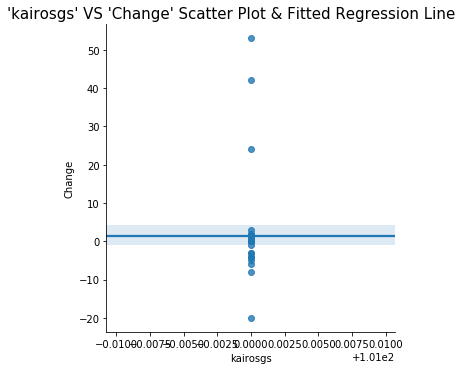

<Figure size 1080x432 with 0 Axes>

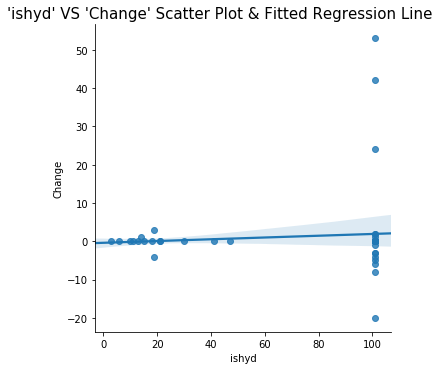

<Figure size 1080x432 with 0 Axes>

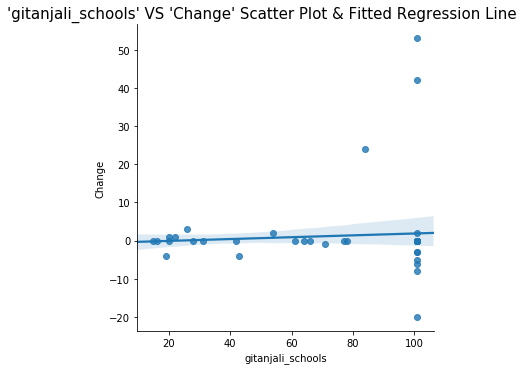

In [41]:
# Lets See the Scatter and Fitter Regression Line Plot Visualization for all the Numerical Columns W.R.T To "Change"
for i in num_cols:
    fig = plt.figure(figsize=(15,6))
    fig = sns.lmplot(x=i, y="Change", data=combined_df)
    fig.set(xlabel=i, ylabel='Change')
    plt.suptitle("'{X}' VS '{Y}' Scatter Plot & Fitted Regression Line ".format(X=i,Y='Change'),y = 1.02,fontsize=15)
    plt.tight_layout()
    plt.show()

<Figure size 1080x432 with 0 Axes>

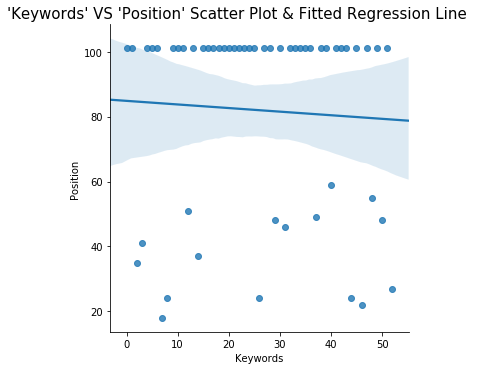

<Figure size 1080x432 with 0 Axes>

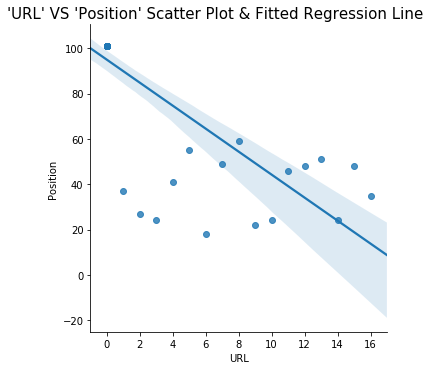

<Figure size 1080x432 with 0 Axes>

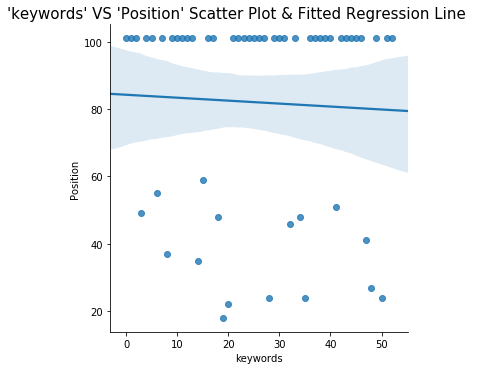

In [42]:
# Lets See Scatter and Fitter Regression Line Plot Visualization for Categorical Variables W.R.T "Position"
for i in cat_cols:
    fig = plt.figure(figsize=(15,6))
    fig = sns.lmplot(x=i, y="Position", data=combined_df)
    fig.set(xlabel=i, ylabel='Position')
    plt.suptitle("'{X}' VS '{Y}' Scatter Plot & Fitted Regression Line ".format(X=i,Y='Position'),y = 1.02,fontsize=15)
    plt.tight_layout()
    plt.show()

<Figure size 1080x432 with 0 Axes>

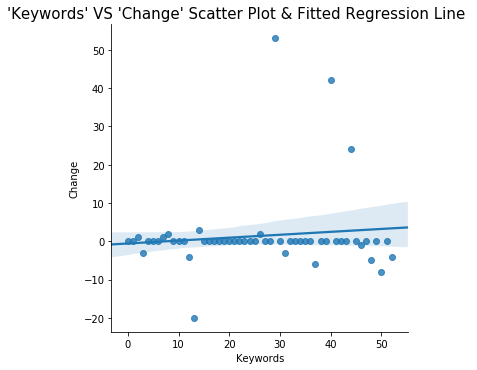

<Figure size 1080x432 with 0 Axes>

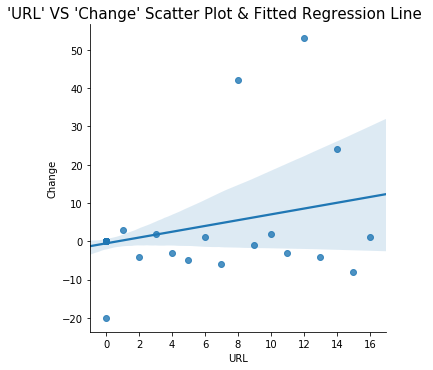

<Figure size 1080x432 with 0 Axes>

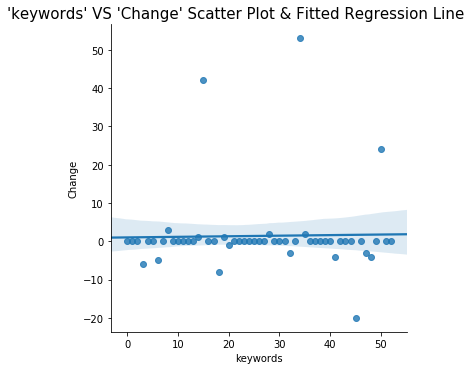

In [43]:
# Lets See Scatter and Fitter Regression Line Plot Visualization for Categorical Variables W.R.T "Change"
for i in cat_cols:
    fig = plt.figure(figsize=(15,6))
    fig = sns.lmplot(x=i, y="Change", data=combined_df)
    fig.set(xlabel=i, ylabel='Change')
    plt.suptitle("'{X}' VS '{Y}' Scatter Plot & Fitted Regression Line ".format(X=i,Y='Change'),y = 1.02,fontsize=15)
    plt.tight_layout()
    plt.show()

# TIME SERIES FORECASTING

In [44]:
# Checking the complete data set before performing any tranformation of data 
combined_df.head()

Keywords  Position  Change  URL  keywords  openminds_hyd_1  \
0        32       101       0    0        31               46   
1        31        46      -3   11        32              101   
2        29        48      53   12        34              101   
3        40        59      42    8        15              101   
4        44        24      24   14        50               48   

   merut_international_school  drs_international  oakridge  openminds_hyd_2  \
0                         101                101       101               46   
1                         101                101       101              101   
2                         101                101        12              101   
3                         101                101       101              101   
4                         101                 30        29               48   

   kairosgs  ishyd  gitanjali_schools  
0       101    101                101  
1       101    101                101  
2       101    101                101  
3       101    101                101  
4       101    101                 84

# Dickey-Fuller Test 

In [45]:
# Performing Dickey Fuller Test and defining our function to perform this test

from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    """ Stationarity means to see wheather the data is
        Moving or Not Moving"""
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd  = timeseries.rolling(12).std()
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    plt.figure(figsize=(20,15))
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

* <b> How to Check Stationarity of a Time Series?

A TS is said to be stationary if its statistical properties such as mean, variance remain constant over time. But why is it important? Most of the TS models work on the assumption that the TS is stationary. Intuitively, we can sat that if a TS has a particular behaviour over time, there is a very high probability that it will follow the same in the future. Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series.

Stationarity is defined using very strict criterion. However, for practical purposes we can assume the series to be stationary if it has constant statistical properties over time, ie. the following:

* constant mean
* constant variance
* an autocovariance that does not depend on time. </b>

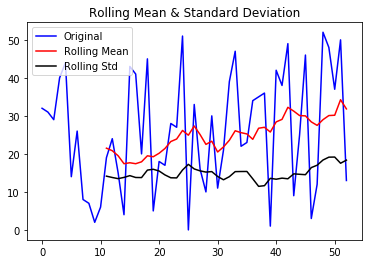

Results of Dickey-Fuller Test:
Test Statistic                -6.740054e+00
p-value                        3.135433e-09
#Lags Used                     0.000000e+00
Number of Observations Used    5.200000e+01
Critical Value (1%)           -3.562879e+00
Critical Value (5%)           -2.918973e+00
Critical Value (10%)          -2.597393e+00
dtype: float64


<Figure size 1440x1080 with 0 Axes>

In [46]:
# Passing the data to the defined function to get the Dickey Fuller Test Results and Rolling Statistics 
# For the Organic_Sense_KW_Data
test_stationarity(combined_df['Keywords'])

<b> It is clearly evident that there is an overall increasing trend in the data along with some seasonal variations. However, it might not always be possible to make such visual inferences (we’ll see such cases later). So, more formally, we can check stationarity using the following:

* Plotting Rolling Statistics: We can plot the moving average or moving variance and see if it varies with time. By moving average/variance I mean that at any instant ‘t’, we’ll take the average/variance of the last year, i.e. last 12 months. But again this is more of a visual technique.
* Dickey-Fuller Test: This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary. </b>

<b> As we can clearly see the variation in standard deviation small but the mean is increasing with time, Here The Test-Statistic is very less than the critical values and by rejecting null hypothesis we are saying that the series is Stationary for 'KEYWORDS' FOR ORGANIC_SENSE_KEYWORD_RANK. </b>

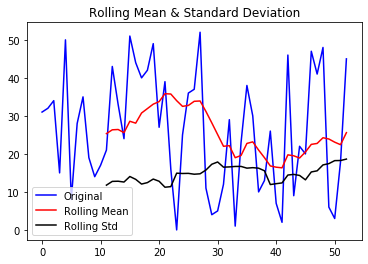

Results of Dickey-Fuller Test:
Test Statistic                -5.693571e+00
p-value                        7.968316e-07
#Lags Used                     0.000000e+00
Number of Observations Used    5.200000e+01
Critical Value (1%)           -3.562879e+00
Critical Value (5%)           -2.918973e+00
Critical Value (10%)          -2.597393e+00
dtype: float64


<Figure size 1440x1080 with 0 Axes>

In [47]:
# Passing the data to the defined function to get the Dickey Fuller Test Results and Rolling Statistics 
# # For the Organic_Sense_Competitor_Data
test_stationarity(combined_df['keywords'])

<b> As we can clearly see the variation in standard deviation here is quite going up but the mean is decresing with time, Here The Test-Statistic is very less than the critical values and by rejecting null hypothesis we are saying that the series is Stationary for 'keywords' column FOR ORGANIC_SENSE_COMPETETIOR.</b>

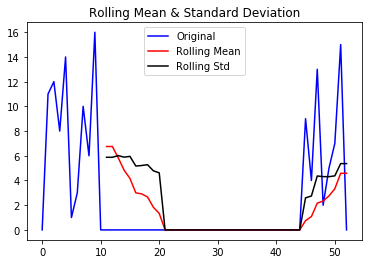

Results of Dickey-Fuller Test:
Test Statistic                 -2.620781
p-value                         0.088778
#Lags Used                      1.000000
Number of Observations Used    51.000000
Critical Value (1%)            -3.565624
Critical Value (5%)            -2.920142
Critical Value (10%)           -2.598015
dtype: float64


<Figure size 1440x1080 with 0 Axes>

In [48]:
# Passing the data to the defined function to get the 'Dickey Fuller Test Results' and Rolling Statistics 
# # For the Organic_Sense_KW_Data
test_stationarity(combined_df['URL'])

<b> As we can clearly see the variation in standard deviation dropped and then gradually increased but the mean also dropped and increased with time, Here The Test-Statistic is less than the critical value of (5%) and by rejecting null hypothesis we are saying that the series is Stationary for 'URL' column FOR ORGANIC_SENSE_KEYWORD_RANK. </b>

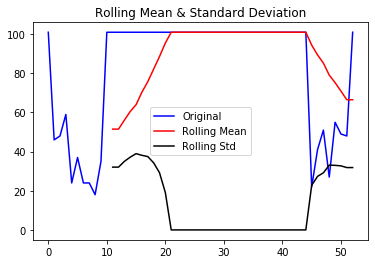

Results of Dickey-Fuller Test:
Test Statistic                 -2.816247
p-value                         0.055990
#Lags Used                      3.000000
Number of Observations Used    49.000000
Critical Value (1%)            -3.571472
Critical Value (5%)            -2.922629
Critical Value (10%)           -2.599336
dtype: float64


<Figure size 1440x1080 with 0 Axes>

In [49]:
# Passing the data to the defined function to get the Dickey Fuller Test Results and Rolling Statistics 
# # For the Organic_Sense_KW_Data
test_stationarity(combined_df['Position'])

<b> As we can clearly see the variation in standard deviation dropped and then gradually increased but the mean increased and dropped gradually with time, Here The Test-Statistic is less than the critical value of (5%) and just by looking the graph we can see that the series is not Stationary here for 'URL' column FOR ORGANIC_SENSE_KEYWORD_RANK. </b>

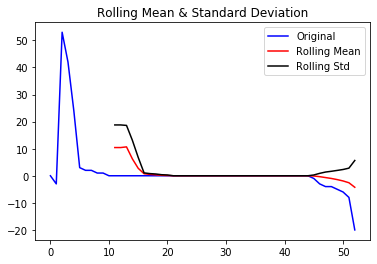

Results of Dickey-Fuller Test:
Test Statistic                 32.334616
p-value                         1.000000
#Lags Used                      9.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64


<Figure size 1440x1080 with 0 Axes>

In [50]:
# Passing the data to the defined function to get the Dickey Fuller Test Results and Rolling Statistics 
# # For the Organic_Sense_KW_Data
test_stationarity(combined_df['Change'])

<b> As we can clearly see the variation in standard deviation, mean and series are lying on the same series trend line and  then gradually changing from there for the column 'CHANGE' and here we can clearly see that the Test statistics is Very High when compared with Critical Values and by accepting Null Hypothesis we can say that the series is 'Not Stationary' ORGANIC_SENSE_KEYWORD_RANK. </b>

# APPLYING LOG TRANSFORMATION

In [51]:
# Applying Transformation which penalize the higher values more than the smaller values so we can take a log,square-root, cube-rootetc
# Here lets take a log transformation for now
combined_df_log = np.log(combined_df)

In [52]:
# Checking the transformed data
combined_df_log.head()

Keywords  Position    Change       URL  keywords  openminds_hyd_1  \
0  3.465736  4.615121      -inf      -inf  3.433987         3.828641   
1  3.433987  3.828641       NaN  2.397895  3.465736         4.615121   
2  3.367296  3.871201  3.970292  2.484907  3.526361         4.615121   
3  3.688879  4.077537  3.737670  2.079442  2.708050         4.615121   
4  3.784190  3.178054  3.178054  2.639057  3.912023         3.871201   

   merut_international_school  drs_international  oakridge  openminds_hyd_2  \
0                    4.615121           4.615121  4.615121         3.828641   
1                    4.615121           4.615121  4.615121         4.615121   
2                    4.615121           4.615121  2.484907         4.615121   
3                    4.615121           4.615121  4.615121         4.615121   
4                    4.615121           3.401197  3.367296         3.871201   

   kairosgs     ishyd  gitanjali_schools  
0  4.615121  4.615121           4.615121  
1  4.615121  4.615121           4.615121  
2  4.615121  4.615121           4.615121  
3  4.615121  4.615121           4.615121  
4  4.615121  4.615121           4.430817

In [53]:
# Replacing inf values with NA's
combined_df_log.replace(-np.inf, np.nan, inplace=True)
combined_df_log.head()

Keywords  Position    Change       URL  keywords  openminds_hyd_1  \
0  3.465736  4.615121       NaN       NaN  3.433987         3.828641   
1  3.433987  3.828641       NaN  2.397895  3.465736         4.615121   
2  3.367296  3.871201  3.970292  2.484907  3.526361         4.615121   
3  3.688879  4.077537  3.737670  2.079442  2.708050         4.615121   
4  3.784190  3.178054  3.178054  2.639057  3.912023         3.871201   

   merut_international_school  drs_international  oakridge  openminds_hyd_2  \
0                    4.615121           4.615121  4.615121         3.828641   
1                    4.615121           4.615121  4.615121         4.615121   
2                    4.615121           4.615121  2.484907         4.615121   
3                    4.615121           4.615121  4.615121         4.615121   
4                    4.615121           3.401197  3.367296         3.871201   

   kairosgs     ishyd  gitanjali_schools  
0  4.615121  4.615121           4.615121  
1  4.615121  4.615121           4.615121  
2  4.615121  4.615121           4.615121  
3  4.615121  4.615121           4.615121  
4  4.615121  4.615121           4.430817

In [54]:
# Replacing NaN's with Zeros
combined_df_log.fillna(0, inplace=True)
combined_df_log.head()

Keywords  Position    Change       URL  keywords  openminds_hyd_1  \
0  3.465736  4.615121  0.000000  0.000000  3.433987         3.828641   
1  3.433987  3.828641  0.000000  2.397895  3.465736         4.615121   
2  3.367296  3.871201  3.970292  2.484907  3.526361         4.615121   
3  3.688879  4.077537  3.737670  2.079442  2.708050         4.615121   
4  3.784190  3.178054  3.178054  2.639057  3.912023         3.871201   

   merut_international_school  drs_international  oakridge  openminds_hyd_2  \
0                    4.615121           4.615121  4.615121         3.828641   
1                    4.615121           4.615121  4.615121         4.615121   
2                    4.615121           4.615121  2.484907         4.615121   
3                    4.615121           4.615121  4.615121         4.615121   
4                    4.615121           3.401197  3.367296         3.871201   

   kairosgs     ishyd  gitanjali_schools  
0  4.615121  4.615121           4.615121  
1  4.615121  4.615121           4.615121  
2  4.615121  4.615121           4.615121  
3  4.615121  4.615121           4.615121  
4  4.615121  4.615121           4.430817

<b> 
* Estimating & Eliminating Trend
One of the first tricks to reduce trend can be transformation. For example, in this case we can clearly see that the there is a significant positive trend. So we can apply transformation which penalize higher values more than smaller values. These can be taking a log, square root, cube root, etc. Lets take a log transform here for simplicity: </b>

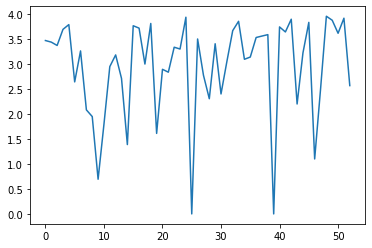

In [55]:
# Plotting after the Transformation W.R.T To "Keywords"
plt.plot(combined_df_log['Keywords'])

* From the above visualization it is clear that the trend line of keywords is continous here after applying the log transformation.

<b> In this simpler case, it is easy to see a forward trend in the data. But its not very intuitive in presence of noise. So we can use some techniques to estimate or model this trend and then remove it from the series. There can be many ways of doing it and some of most commonly used are: </b> 

* Aggregation – taking average for a time period like monthly/weekly averages
* Smoothing – taking rolling averages
* Polynomial Fitting – fit a regression model

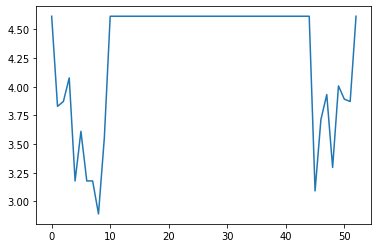

In [56]:
# Plotting after the Transformation W.R.T To "Position"
plt.plot(combined_df_log['Position'])

* Here W.R.T to Position the there is drastic drop initially then an huge increase of the trend line and it is flat to some exeent then again a huge drop of the trend line and again it increases. 

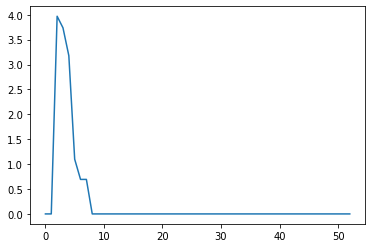

In [57]:
# Plotting after the Transformation W.R.T To "Change"
plt.plot(combined_df_log['Change'])

* Here W.R.T to change variable there is a negative trend line we can see here after applying the log transformation on the data.

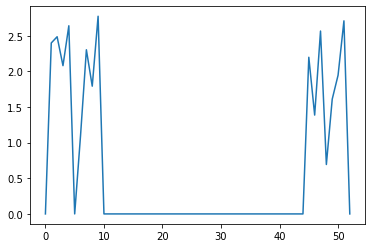

In [58]:
# Plotting after the Transformation W.R.T To "URL"
plt.plot(combined_df_log['URL'])

* From the visualization we can see there is a disproportion of the trend line W.R.T 'URL'.

# MOVING AVERAGE

In [59]:
# Calculating the Moving Average 
moving_avg = combined_df_log.rolling(12).mean()

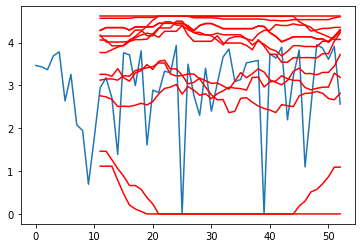

In [60]:
# PLotting W.R.T TO 'KEYWORDS'
plt.plot(combined_df_log['Keywords'])
plt.plot(moving_avg, color='red')

<b> The red line shows the rolling mean. Lets subtract this from the original series. Note that since we are taking
 average of last 12 values, rolling mean is not defined for first 11 values. This can be observed as:</b>

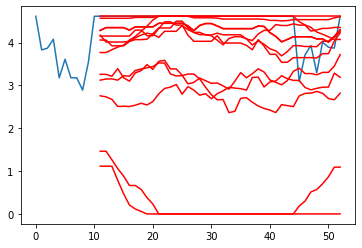

In [61]:
# Let's also PLot W.R.T TO 'Position'
plt.plot(combined_df_log['Position'])
plt.plot(moving_avg, color='red')

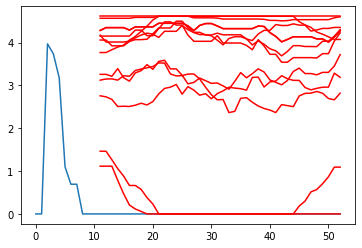

In [62]:
# Let's also PLot W.R.T TO 'Change'
plt.plot(combined_df_log['Change'])
plt.plot(moving_avg, color='red')

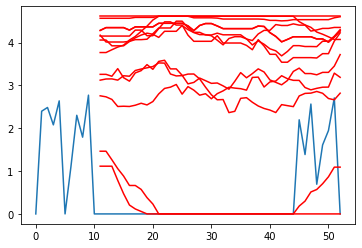

In [63]:
# Let's also PLot W.R.T TO 'URL'
plt.plot(combined_df_log['URL'])
plt.plot(moving_avg, color='red')

In [64]:
ts_log_moving_avg_diff = combined_df_log - moving_avg
ts_log_moving_avg_diff.head()

Keywords  Position  Change  URL  keywords  openminds_hyd_1  \
0       NaN       NaN     NaN  NaN       NaN              NaN   
1       NaN       NaN     NaN  NaN       NaN              NaN   
2       NaN       NaN     NaN  NaN       NaN              NaN   
3       NaN       NaN     NaN  NaN       NaN              NaN   
4       NaN       NaN     NaN  NaN       NaN              NaN   

   merut_international_school  drs_international  oakridge  openminds_hyd_2  \
0                         NaN                NaN       NaN              NaN   
1                         NaN                NaN       NaN              NaN   
2                         NaN                NaN       NaN              NaN   
3                         NaN                NaN       NaN              NaN   
4                         NaN                NaN       NaN              NaN   

   kairosgs  ishyd  gitanjali_schools  
0       NaN    NaN                NaN  
1       NaN    NaN                NaN  
2       NaN    NaN                NaN  
3       NaN    NaN                NaN  
4       NaN    NaN                NaN

In [65]:
# Saving the subtracted results to dataframe
ts_log_moving_avg_diff = pd.DataFrame(ts_log_moving_avg_diff)

In [66]:
# Saving the subtracted results to dataframe
ts_log_moving_avg_diff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 13 columns):
Keywords                      42 non-null float64
Position                      42 non-null float64
Change                        42 non-null float64
URL                           42 non-null float64
keywords                      42 non-null float64
openminds_hyd_1               42 non-null float64
merut_international_school    42 non-null float64
drs_international             42 non-null float64
oakridge                      42 non-null float64
openminds_hyd_2               42 non-null float64
kairosgs                      42 non-null float64
ishyd                         42 non-null float64
gitanjali_schools             42 non-null float64
dtypes: float64(13)
memory usage: 5.5 KB


In [67]:
# Replacing inf values with NA's
# ts_log_moving_avg_diff.replace(np.inf, np.nan)
# ts_log_moving_avg_diff.head()

<b> Notice the first 11 being Nan. Lets drop these NaN values and check the plots to test stationarity. </b>

In [68]:
# Replacing NaN's with Zeros
ts_log_moving_avg_diff.fillna(0, inplace=True)
ts_log_moving_avg_diff.head()

Keywords  Position  Change  URL  keywords  openminds_hyd_1  \
0       0.0       0.0     0.0  0.0       0.0              0.0   
1       0.0       0.0     0.0  0.0       0.0              0.0   
2       0.0       0.0     0.0  0.0       0.0              0.0   
3       0.0       0.0     0.0  0.0       0.0              0.0   
4       0.0       0.0     0.0  0.0       0.0              0.0   

   merut_international_school  drs_international  oakridge  openminds_hyd_2  \
0                         0.0                0.0       0.0              0.0   
1                         0.0                0.0       0.0              0.0   
2                         0.0                0.0       0.0              0.0   
3                         0.0                0.0       0.0              0.0   
4                         0.0                0.0       0.0              0.0   

   kairosgs  ishyd  gitanjali_schools  
0       0.0    0.0                0.0  
1       0.0    0.0                0.0  
2       0.0    0.0                0.0  
3       0.0    0.0                0.0  
4       0.0    0.0                0.0

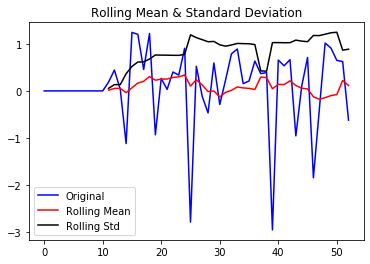

Results of Dickey-Fuller Test:
Test Statistic                -8.205184e+00
p-value                        7.055930e-13
#Lags Used                     0.000000e+00
Number of Observations Used    5.200000e+01
Critical Value (1%)           -3.562879e+00
Critical Value (5%)           -2.918973e+00
Critical Value (10%)          -2.597393e+00
dtype: float64


<Figure size 1440x1080 with 0 Axes>

In [69]:
# Checking the Stationarity W.R.T 'KEYWORDS'
test_stationarity(ts_log_moving_avg_diff['Keywords'])

<b> This looks like a much better series. The rolling values appear to be varying slightly but there is no specific trend. Also, the test statistic is smaller than the 5% critical values so we can say with 95% confidence that this is a stationary series. </b>

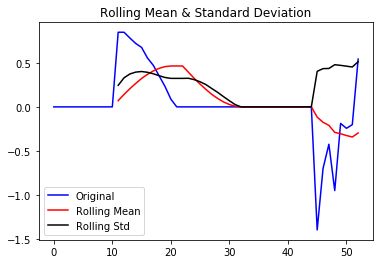

Results of Dickey-Fuller Test:
Test Statistic                 -2.712466
p-value                         0.071906
#Lags Used                      3.000000
Number of Observations Used    49.000000
Critical Value (1%)            -3.571472
Critical Value (5%)            -2.922629
Critical Value (10%)           -2.599336
dtype: float64


<Figure size 1440x1080 with 0 Axes>

In [70]:
# Checking the Stationarity W.R.T 'Position'
test_stationarity(ts_log_moving_avg_diff['Position'])

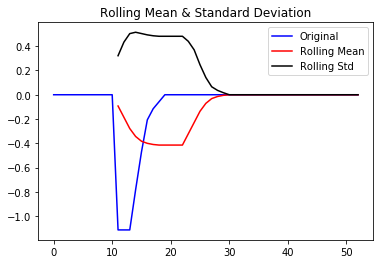

Results of Dickey-Fuller Test:
Test Statistic                -124.678735
p-value                          0.000000
#Lags Used                      11.000000
Number of Observations Used     41.000000
Critical Value (1%)             -3.600983
Critical Value (5%)             -2.935135
Critical Value (10%)            -2.605963
dtype: float64


<Figure size 1440x1080 with 0 Axes>

In [71]:
# Checking the Stationarity W.R.T 'Change'
test_stationarity(ts_log_moving_avg_diff['Change'])

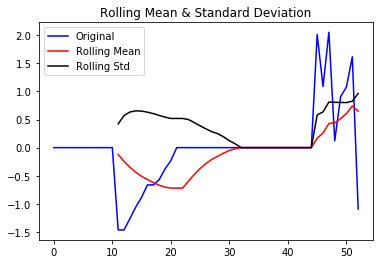

Results of Dickey-Fuller Test:
Test Statistic                 -1.509121
p-value                         0.528994
#Lags Used                      7.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64


<Figure size 1440x1080 with 0 Axes>

In [72]:
# Checking the Stationarity W.R.T 'URL'
test_stationarity(ts_log_moving_avg_diff['URL'])

* However, a drawback in this particular approach is that the time-period has to be strictly defined. In this case we can take yearly averages but in complex situations like forecasting a stock price, its difficult to come up with a number. So we take a ‘weighted moving average’ where more recent values are given a higher weight. There can be many technique for assigning weights. A popular one is exponentially weighted moving average where weights are assigned to all the previous values with a decay factor. Find details here. This can be implemented in Pandas as:

# Exponentially Weighted Moving Average

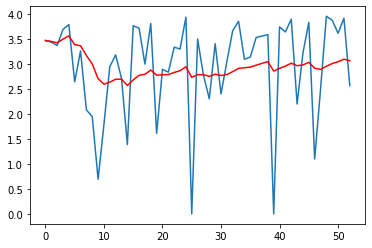

In [73]:
# Performing ewma
expwighted_avg = combined_df_log.ewm(halflife=12).mean() 
# And Plotting W.R.T Keywords 
plt.plot(combined_df_log['Keywords'])
plt.plot(expwighted_avg['Keywords'], color='red')

* Note that here the parameter ‘halflife’ is used to define the amount of exponential decay. This is just an assumption here and would depend largely on the business domain. Other parameters like span and center of mass can also be used to define decay. 

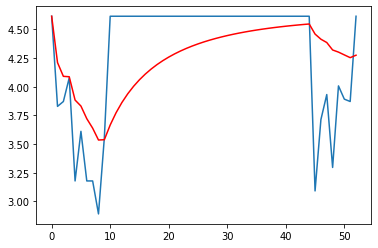

In [74]:
# Plotting W.R.T Position 
plt.plot(combined_df_log['Position'])
plt.plot(expwighted_avg['Position'], color='red')

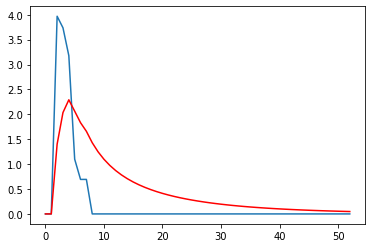

In [75]:
# Plotting W.R.T Change 
plt.plot(combined_df_log['Change'])
plt.plot(expwighted_avg['Change'], color='red')

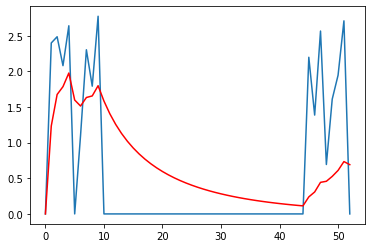

In [76]:
# Plotting W.R.T URL 
plt.plot(combined_df_log['URL'])
plt.plot(expwighted_avg['URL'], color='red')

# Now, let’s remove this from series and check stationarity:

In [77]:
# Lets CHeck The Stationarity
ts_log_ewma_diff = combined_df_log - expwighted_avg
ts_log_ewma_diff

Keywords  Position    Change       URL  keywords  openminds_hyd_1  \
0   0.000000  0.000000  0.000000  0.000000  0.000000         0.000000   
1  -0.015416 -0.381886  0.000000  1.164330  0.015416         0.381886   
2  -0.053143 -0.219625  2.569724  0.809916  0.049216         0.247171   
3   0.195409 -0.009673  1.701272  0.294416 -0.559855         0.179926   
4   0.225672 -0.705737  0.886216  0.662946  0.500000        -0.437803   
5  -0.743269 -0.220584 -0.964574 -1.597438 -1.077226        -0.914232   
6  -0.103265 -0.543173 -1.138833 -0.414645  0.145914         0.434602   
7  -1.087485 -0.460787 -0.966101  0.669607  0.313081         0.368684   
8  -1.051971 -0.644847 -1.429531  0.136798 -0.256595         0.317641   
9  -2.009921  0.017555 -1.246671  0.974665 -0.490091        -0.598739   
10 -0.802545  0.948750 -1.097883 -1.583345 -0.260615         0.357072   
11  0.310831  0.842252 -0.974644 -1.405612 -0.043772         0.316990   
12  0.486579  0.752732 -0.871053 -1.256215  0.601386         0.283299   
13  0.014898  0.676549 -0.782894 -1.129075  0.302616         0.254626   
14 -1.180298  0.611029 -0.707076 -1.019731 -0.014304         0.229967   
15  1.083445  0.554171 -0.641280 -0.924841  0.670658         0.208568   
16  0.942862  0.504439 -0.583731 -0.841845  0.476085        -1.118253   
17  0.205485  0.460643 -0.533051 -0.768755  0.347716        -0.199775   
18  0.930797  0.421840 -0.488148 -0.703998  0.363106         0.309352   
19 -1.162666  0.387277 -0.448153 -0.646317  0.474876         0.284006   
20  0.108822  0.356345 -0.412358 -0.594695 -0.111434         0.261322   
21  0.047633  0.328543 -0.380186 -0.548297  0.236295         0.240934   
22  0.504890  0.303460 -0.351160 -0.506436 -0.604695         0.222539   
23  0.433461  0.280751 -0.324881 -0.468537 -3.124547         0.205886   
24  0.990888  0.260127 -0.301016 -0.434119  0.087399         0.190761   
25 -2.728577  0.241343 -0.279280 -0.402772  0.419401         0.176987   
26  0.713357  0.224192 -0.259433 -0.374149  0.415048        -0.507490   
27 -0.009822  0.208494 -0.241267 -0.347951  0.702483        -1.026209   
28 -0.446689  0.194096 -0.224606 -0.323922 -0.792105         0.272835   
29  0.607476  0.180863 -0.209292 -0.301837 -1.680733         0.254234   
30 -0.369161  0.168679 -0.195193 -0.281504 -1.359397         0.237107   
31  0.258982  0.157442 -0.182190 -0.262751 -0.451690        -0.416464   
32  0.820138  0.147062 -0.170179 -0.245429  0.402305        -0.445636   
33  0.940999  0.137461 -0.159069 -0.229406 -2.771419         0.278810   
34  0.170126  0.128569 -0.148778 -0.214565  0.340522         0.260773   
35  0.200814  0.120322 -0.139235 -0.200802  0.788565         0.244046   
36  0.554030  0.112665 -0.130375 -0.188024  0.517040         0.228516   
37  0.546195  0.105549 -0.122140 -0.176149 -0.544841         0.214083   
38  0.538342  0.098929 -0.114480 -0.165101 -0.264760         0.200656   
39 -2.855440  0.092765 -0.107347 -0.154814  0.401695        -1.159373   
40  0.827598  0.087021 -0.100700 -0.145227 -0.854109        -1.357447   
41  0.682723  0.081663 -0.094500 -0.136286 -1.977157        -0.649837   
42  0.879584  0.076663 -0.088713 -0.127940  1.087407        -1.045919   
43 -0.765359  0.071992 -0.083309 -0.120146 -0.510867         0.449029   
44  0.240753  0.067627 -0.078257 -0.112861  0.359732         0.421803   
45  0.799181 -1.368539 -0.073534  1.958551  0.248461         0.396343   
46 -1.814793 -0.701170 -0.069114  1.078642  1.036587         0.372520   
47 -0.402846 -0.454006 -0.064976  2.122159  0.846130         0.350219   
48  1.000060 -1.024983 -0.061101  0.235424  0.943891        -0.242206   
49  0.865336 -0.294854 -0.057469  1.083263 -1.068059         0.343853   
50  0.569210 -0.386057 -0.054065  1.335631 -1.656874        -0.524658   
51  0.818919 -0.382660 -0.050872  1.973887  0.126920         0.354633   
52 -0.497056  0.339987 -0.047877 -0.690934  0.981783         0.333751   

    merut_international_school  drs_international  oakridge  

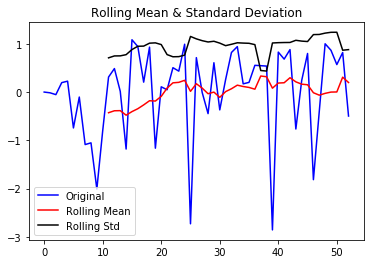

Results of Dickey-Fuller Test:
Test Statistic                 -5.283310
p-value                         0.000006
#Lags Used                      1.000000
Number of Observations Used    51.000000
Critical Value (1%)            -3.565624
Critical Value (5%)            -2.920142
Critical Value (10%)           -2.598015
dtype: float64


<Figure size 1440x1080 with 0 Axes>

In [78]:
# Plot to visualize the stationary W.R.T Keywords
test_stationarity(ts_log_ewma_diff['Keywords'])

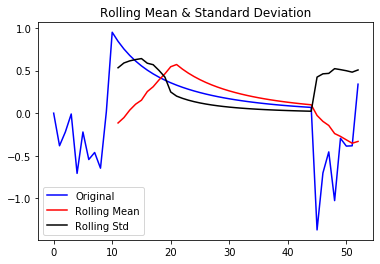

Results of Dickey-Fuller Test:
Test Statistic                 -2.599173
p-value                         0.093168
#Lags Used                      3.000000
Number of Observations Used    49.000000
Critical Value (1%)            -3.571472
Critical Value (5%)            -2.922629
Critical Value (10%)           -2.599336
dtype: float64


<Figure size 1440x1080 with 0 Axes>

In [79]:
# Plot to visualize the stationary W.R.T Position
test_stationarity(ts_log_ewma_diff['Position'])

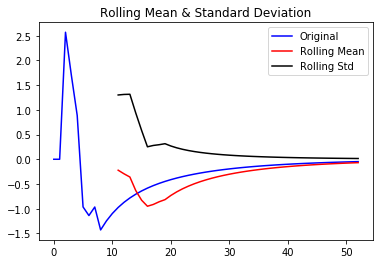

Results of Dickey-Fuller Test:
Test Statistic                -69.712908
p-value                         0.000000
#Lags Used                     11.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64


<Figure size 1440x1080 with 0 Axes>

In [80]:
# Plot to visualize the stationary W.R.T Change
test_stationarity(ts_log_ewma_diff['Change'])

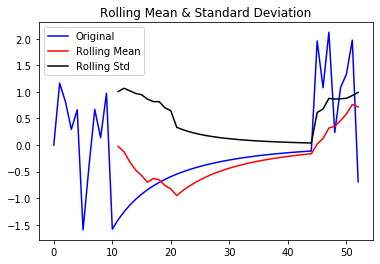

Results of Dickey-Fuller Test:
Test Statistic                 -1.994776
p-value                         0.288868
#Lags Used                      3.000000
Number of Observations Used    49.000000
Critical Value (1%)            -3.571472
Critical Value (5%)            -2.922629
Critical Value (10%)           -2.599336
dtype: float64


<Figure size 1440x1080 with 0 Axes>

In [81]:
# Plot to visualize the stationary W.R.T URL
test_stationarity(ts_log_ewma_diff['URL'])

* This TS has even lesser variations in mean and standard deviation in magnitude. Also, the test statistic is smaller than the 1% critical value, which is better than the previous case. Note that in this case there will be no missing values as all values from starting are given weights. So it’ll work even with no previous values.

# Exploring Seasonal Trend Lines Decomposition

<Figure size 432x288 with 0 Axes>

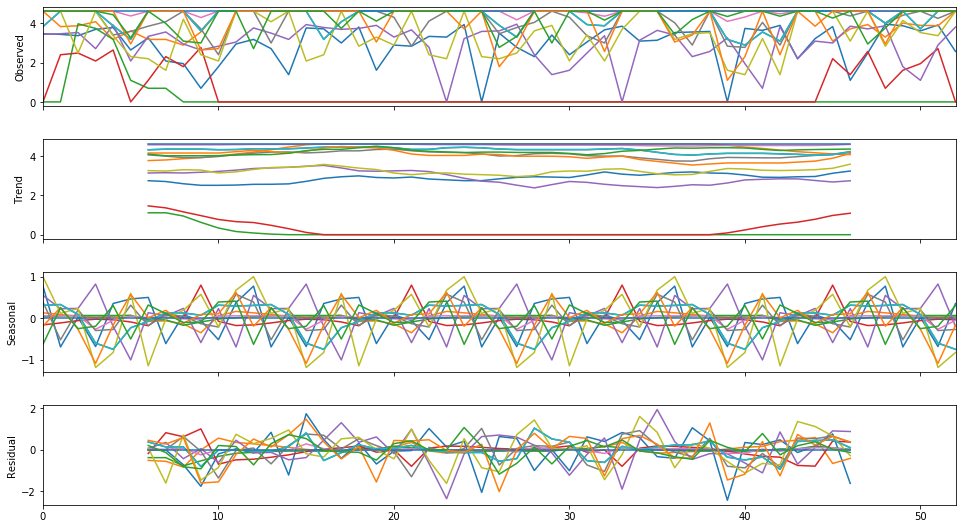

In [82]:
# checking the trend of the whole data-set
decomposition = seasonal_decompose(combined_df_log, freq = 12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

<Figure size 432x288 with 0 Axes>

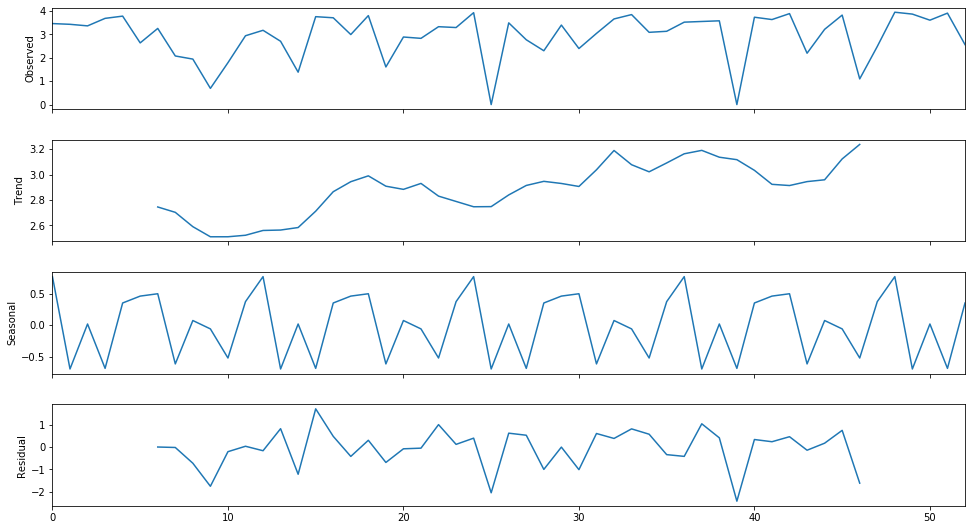

In [83]:
# checking the trend of the 'Keywords' Organic_Sense_Keyword_Rank_data
decomposition = seasonal_decompose(combined_df_log['Keywords'], freq = 12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

<b> The Analysis from the Seasonal Decomposition Visualization We can See that For the Organic_Sense_Keyword_Page The Trend Line of 'Keywords' here it is a Positive Trend Line </b>

<Figure size 432x288 with 0 Axes>

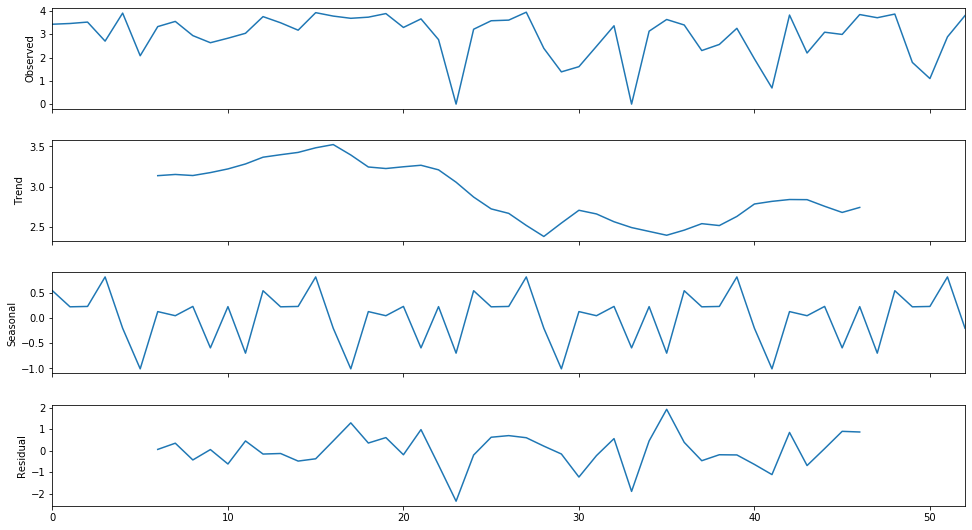

In [84]:
# checking the trend of the 'keywords' Organic_Sense_Competitor_data
decomposition = seasonal_decompose(combined_df_log['keywords'], freq = 12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

 <b> The Analysis from the Seasonal Decomposition Visualization We can See that For the Organic_Sense_Competitor_Page The Trend Line of 'keywords' initially the trend line goes up then drops and goes up gradually </b>

<Figure size 432x288 with 0 Axes>

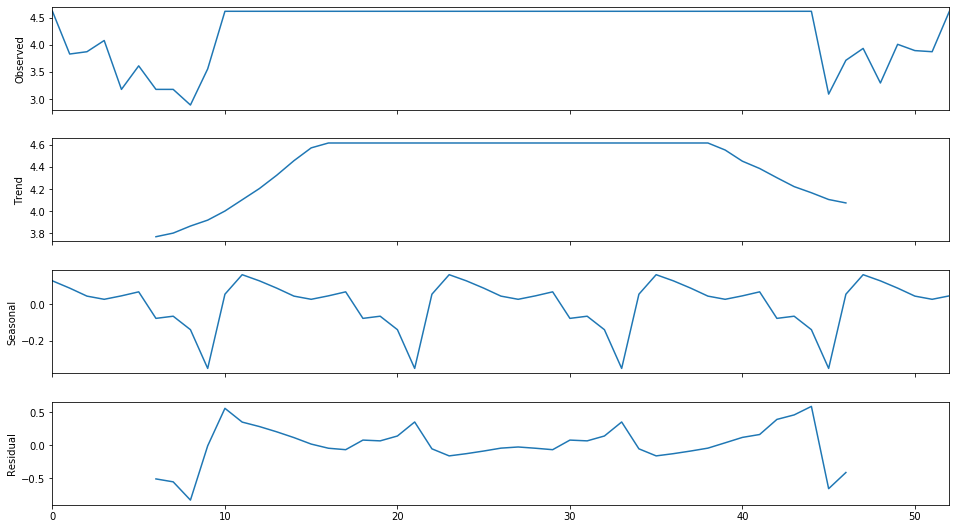

In [85]:
# checking the trend of the 'URL' Organic_Sense_KW_data
decomposition = seasonal_decompose(combined_df_log['Position'], freq = 12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

<b> The Trend Line for 'Position' in Organic_Sense_Keyword_Page the Trend Line is intially Positive and going up and from there it is a Flat Line and the Trend line drops 'Drastically' </b>

<Figure size 432x288 with 0 Axes>

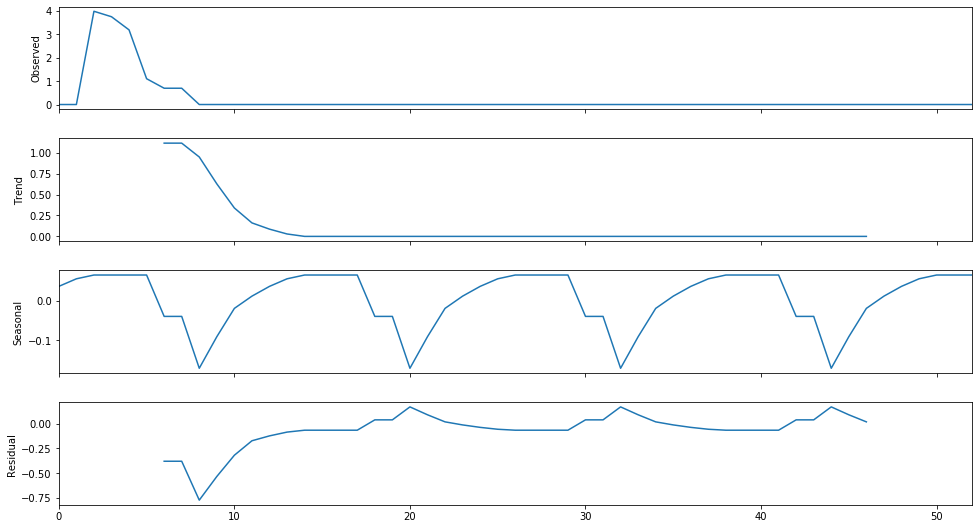

In [86]:
# checking the trend of the 'Change' Organic_Sense_KW_data
decomposition = seasonal_decompose(combined_df_log['Change'], freq = 12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

<b> The Trend Line of 'Change' in Organic_Sense_Keyword_Page W.R.T to the Position of The 'Keywords' is also Drastically falling Down </b>

<Figure size 432x288 with 0 Axes>

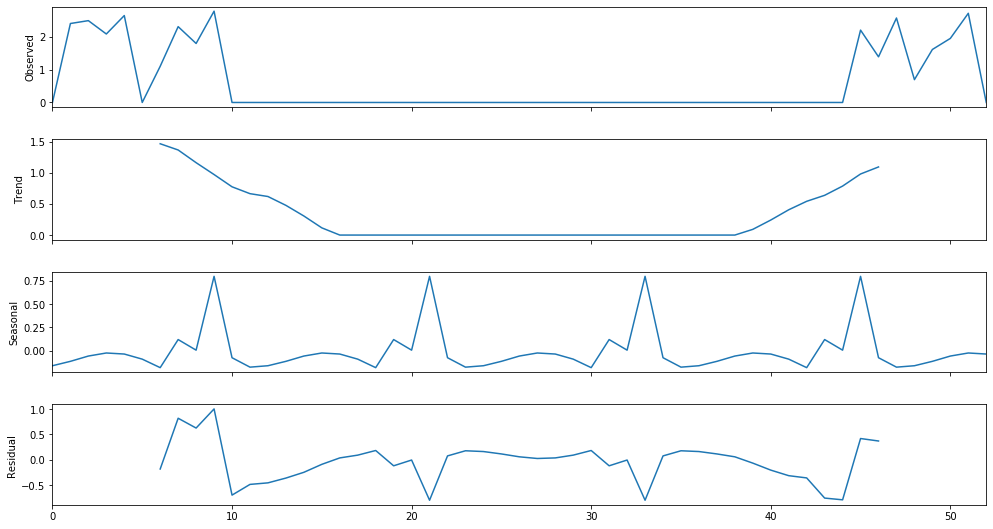

In [87]:
# checking the trend of the 'URL' Organic_Sense_KW_data
decomposition = seasonal_decompose(combined_df_log['URL'], freq = 12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

<b> The Trend Line of the 'URL' for Organic_Sense_Keyword_Page' W.R.T to 'Position' the Trend line initially here it goes down drastically then the Trend Line becomes Flat and Gradually from there We can see there is Positive increasing of the Trend Line</b>

# Eliminating Trend and Seasonality

<b> The simple trend reduction techniques discussed before don’t work in all cases, particularly the ones with high seasonality. Lets discuss two ways of removing trend and seasonality:

* Differencing – taking the differece with a particular time lag 

* Decomposition – modeling both trend and seasonality and removing them from the model.

* Differencing :->

  One of the most common methods of dealing with both trend and seasonality is differencing. 
  In this technique, we take the difference of the observation at a particular instant with that at the previous instant. This mostly works well in improving stationarity. First order differencing can be done in Pandas as: </b>

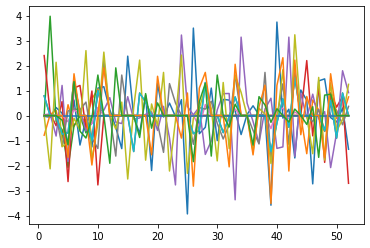

In [88]:
# DIfferencing
ts_log_diff = combined_df_log - combined_df_log.shift()
# Plotting on Whole DataSet
plt.plot(ts_log_diff)

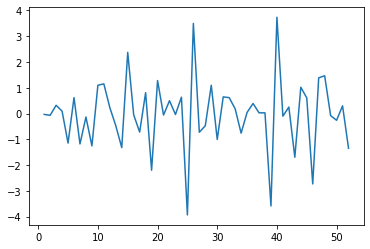

In [89]:
# Plotting on Keywords column
plt.plot(ts_log_diff['Keywords'])

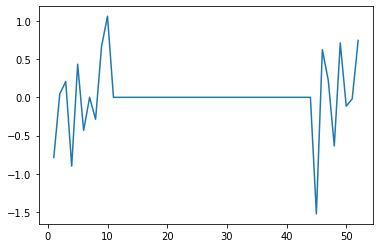

In [90]:
# Plotting on Keywords Position
plt.plot(ts_log_diff['Position'])

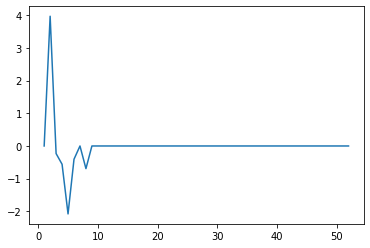

In [91]:
# Plotting on Keywords Change
plt.plot(ts_log_diff['Change'])

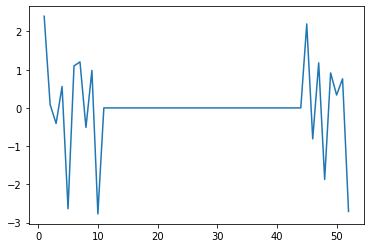

In [92]:
# Plotting on Keywords URL
plt.plot(ts_log_diff['URL'])

This appears to have reduced trend considerably. Lets verify using our plots:

In [93]:
# Lets Drop Nan's
ts_log_diff.dropna(inplace=True)

In [94]:
# Lets look at the dataset after we have performed shift() function
ts_log_diff.head()

Keywords  Position    Change       URL  keywords  openminds_hyd_1  \
1 -0.031749 -0.786479  0.000000  2.397895  0.031749         0.786479   
2 -0.066691  0.042560  3.970292  0.087011  0.060625         0.000000   
3  0.321584  0.206336 -0.232622 -0.405465 -0.818310         0.000000   
4  0.095310 -0.899484 -0.559616  0.559616  1.203973        -0.743920   
5 -1.145132  0.432864 -2.079442 -2.639057 -1.832581        -0.693147   

   merut_international_school  drs_international  oakridge  openminds_hyd_2  \
1                    0.000000           0.000000  0.000000         0.786479   
2                    0.000000           0.000000 -2.130214         0.000000   
3                    0.000000           0.000000  2.130214         0.000000   
4                    0.000000          -1.213923 -1.247825        -0.743920   
5                   -0.245673           0.182322 -1.064711        -0.693147   

   kairosgs     ishyd  gitanjali_schools  
1       0.0  0.000000           0.000000  
2       0.0  0.000000           0.000000  
3       0.0  0.000000           0.000000  
4       0.0  0.000000          -0.184304  
5       0.0 -1.670682          -1.172720

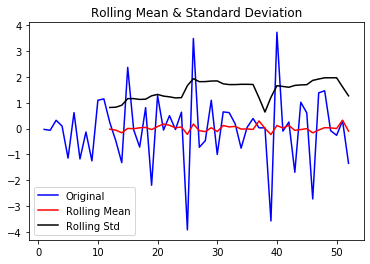

Results of Dickey-Fuller Test:
Test Statistic                -5.926228e+00
p-value                        2.440078e-07
#Lags Used                     3.000000e+00
Number of Observations Used    4.800000e+01
Critical Value (1%)           -3.574589e+00
Critical Value (5%)           -2.923954e+00
Critical Value (10%)          -2.600039e+00
dtype: float64


<Figure size 1440x1080 with 0 Axes>

In [95]:
# Lets see the stationarity now w.r.t to keywords
test_stationarity(ts_log_diff['Keywords'])

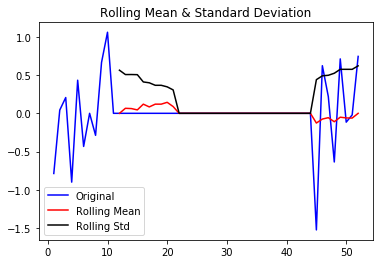

Results of Dickey-Fuller Test:
Test Statistic                 -3.880497
p-value                         0.002183
#Lags Used                      3.000000
Number of Observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
Critical Value (10%)           -2.600039
dtype: float64


<Figure size 1440x1080 with 0 Axes>

In [96]:
# Lets see the stationarity now w.r.t to Position
test_stationarity(ts_log_diff['Position'])

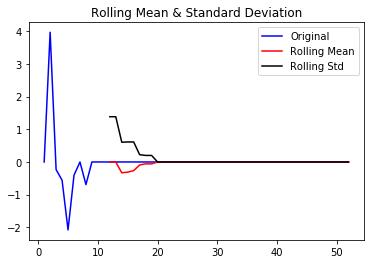

Results of Dickey-Fuller Test:
Test Statistic                -6.608367e+00
p-value                        6.470147e-09
#Lags Used                     0.000000e+00
Number of Observations Used    5.100000e+01
Critical Value (1%)           -3.565624e+00
Critical Value (5%)           -2.920142e+00
Critical Value (10%)          -2.598015e+00
dtype: float64


<Figure size 1440x1080 with 0 Axes>

In [97]:
# Lets see the stationarity now w.r.t to Change
test_stationarity(ts_log_diff['Change'])

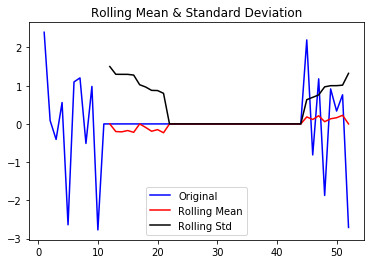

Results of Dickey-Fuller Test:
Test Statistic                 -5.423233
p-value                         0.000003
#Lags Used                      2.000000
Number of Observations Used    49.000000
Critical Value (1%)            -3.571472
Critical Value (5%)            -2.922629
Critical Value (10%)           -2.599336
dtype: float64


<Figure size 1440x1080 with 0 Axes>

In [98]:
# Lets see the stationarity now w.r.t to URL
test_stationarity(ts_log_diff['URL'])

* We can see that the mean and std variations have small variations with time. Also, the Dickey-Fuller test statistic is less than the 10% critical value, thus the TS is stationary with 90% confidence. We can also take second or third order differences which might get even better results in certain applications

# Decomposing

* In this approach, both trend and seasonality are modeled separately and the remaining part of the series is returned. I’ll    skip the statistics and come to the results:

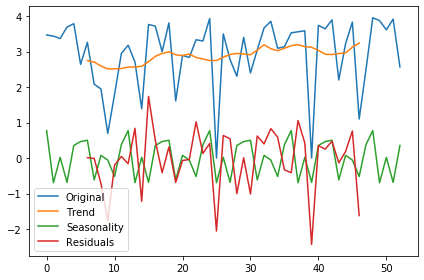

In [99]:
# Plotting W.R.T Keywords
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(combined_df_log['Keywords'], freq = 12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


plt.plot(combined_df_log['Keywords'], label='Original')
plt.legend(loc='best')
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
#fig = plt.figure()   
#fig.set_size_inches(15, 8)
plt.tight_layout()

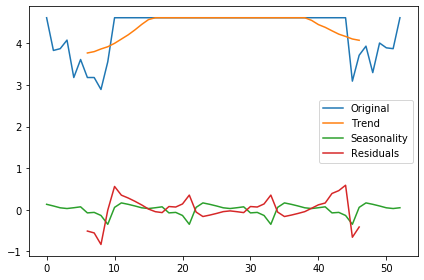

In [100]:
# Plotting W.R.T Position
decomposition = seasonal_decompose(combined_df_log['Position'], freq = 12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


plt.plot(combined_df_log['Position'], label='Original')
plt.legend(loc='best')
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
#fig = plt.figure()   
#fig.set_size_inches(15, 8)
plt.tight_layout()

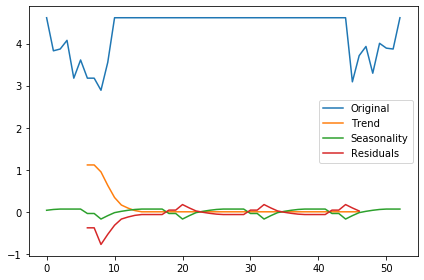

In [101]:
# Plotting W.R.T Change
decomposition = seasonal_decompose(combined_df_log['Change'], freq = 12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


plt.plot(combined_df_log['Position'], label='Original')
plt.legend(loc='best')
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
#fig = plt.figure()   
#fig.set_size_inches(15, 8)
plt.tight_layout()

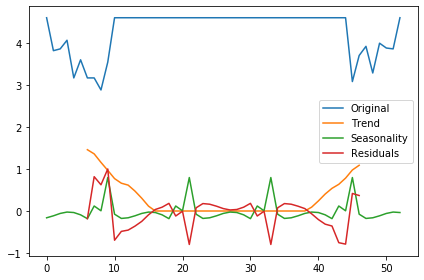

In [102]:
# Plotting W.R.T URL
decomposition = seasonal_decompose(combined_df_log['URL'], freq = 12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


plt.plot(combined_df_log['Position'], label='Original')
plt.legend(loc='best')
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
#fig = plt.figure()   
#fig.set_size_inches(15, 8)
plt.tight_layout()

Here we can see that the trend, seasonality are separated out from data and we can model the residuals. 

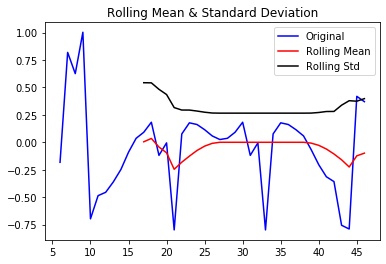

Results of Dickey-Fuller Test:
Test Statistic                 -4.427790
p-value                         0.000265
#Lags Used                      0.000000
Number of Observations Used    40.000000
Critical Value (1%)            -3.605565
Critical Value (5%)            -2.937069
Critical Value (10%)           -2.606986
dtype: float64


<Figure size 1440x1080 with 0 Axes>

In [103]:
# Lets check stationarity of residuals:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

* The Dickey-Fuller test statistic is significantly lower than the 1% critical value. So this TS is very close to stationary. You can try advanced decomposition techniques as well which can generate better results. Also, you should note that converting the residuals into original values for future data in not very intuitive in this case.

# Forecasting a Time Series 

* We saw different techniques and all of them worked reasonably well for making the TS stationary. Lets make model on the TS after differencing as it is a very popular technique. Also, its relatively easier to add noise and seasonality back into predicted residuals in this case. Having performed the trend and seasonality estimation techniques, there can be two situations:

* A strictly stationary series with no dependence among the values. This is the easy case wherein we can model the residuals as white noise. But this is very rare.

* A series with significant dependence among values. In this case we need to use some statistical models like ARIMA to forecast the data.Let me give you a brief introduction to ARIMA. I won’t go into the technical details but you should understand these concepts in detail if you wish to apply them more effectively. ARIMA stands for Auto-Regressive Integrated Moving Averages. The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation. The predictors depend on the parameters (p,d,q) of the ARIMA model:

* Number of AR (Auto-Regressive) terms (p): AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).

* Number of MA (Moving Average) terms (q): MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.

* Number of Differences (d): These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.

* An importance concern here is how to determine the value of ‘p’ and ‘q’. We use two plots to determine these numbers. Lets discuss them first.

* Autocorrelation Function (ACF): It is a measure of the correlation between the the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).

* Partial Autocorrelation Function (PACF): This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.

<b> The ACF and PACF plots for the TS after differencing can be plotted as: </b>

In [104]:
# ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [105]:
# Saving ts_log_diff into a new variable
x = ts_log_diff.copy()
x.head()

Keywords  Position    Change       URL  keywords  openminds_hyd_1  \
1 -0.031749 -0.786479  0.000000  2.397895  0.031749         0.786479   
2 -0.066691  0.042560  3.970292  0.087011  0.060625         0.000000   
3  0.321584  0.206336 -0.232622 -0.405465 -0.818310         0.000000   
4  0.095310 -0.899484 -0.559616  0.559616  1.203973        -0.743920   
5 -1.145132  0.432864 -2.079442 -2.639057 -1.832581        -0.693147   

   merut_international_school  drs_international  oakridge  openminds_hyd_2  \
1                    0.000000           0.000000  0.000000         0.786479   
2                    0.000000           0.000000 -2.130214         0.000000   
3                    0.000000           0.000000  2.130214         0.000000   
4                    0.000000          -1.213923 -1.247825        -0.743920   
5                   -0.245673           0.182322 -1.064711        -0.693147   

   kairosgs     ishyd  gitanjali_schools  
1       0.0  0.000000           0.000000  
2       0.0  0.000000           0.000000  
3       0.0  0.000000           0.000000  
4       0.0  0.000000          -0.184304  
5       0.0 -1.670682          -1.172720

In [106]:
# column vector 
x = x.reset_index().values.ravel()

In [107]:
# Assigning ACF & PACF
lag_acf = acf(x, nlags=20)
lag_pacf = pacf(x, nlags=20, method='ols')

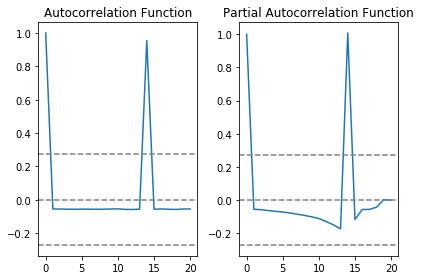

In [108]:
# Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

* In this plot, the two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values as:

* p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=2.

* q – The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=2.

* Now, lets make 3 different ARIMA models considering individual as well as combined effects. I will also print the RSS for each. Please note that here RSS is for the values of residuals and not actual series.

# We need to load the ARIMA model first:

In [109]:
# Importing ARIMA MODEL
from statsmodels.tsa.arima_model import ARIMA

In [110]:
combined_df_log.shape

(53, 13)

The p,d,q values can be specified using the order argument of ARIMA which take a tuple (p,d,q). Let model the 3 cases:

# AR Model

Text(0.5, 1.0, 'RSS: 67.1144')

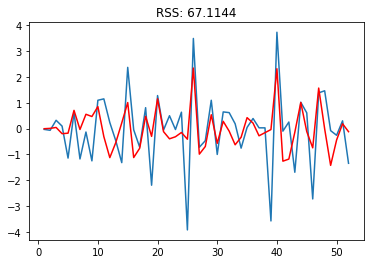

In [111]:
# Fitting the ARIMA Model and Plotting with one column w.r.t "Keywords"
AR_Model = ARIMA(combined_df_log['Keywords'], order=(2, 1, 0))  
results_AR = AR_Model.fit(disp=-1)  
plt.plot(ts_log_diff['Keywords'])
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff['Keywords'])**2))

Text(0.5, 1.0, 'RSS: 7.1555')

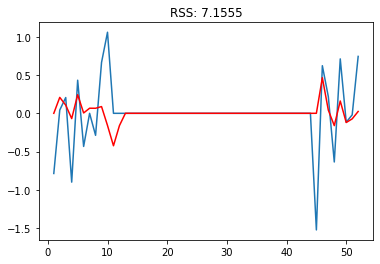

In [112]:
# Fitting the ARIMA Model and Plotting with one column w.r.t "Position"
AR_Model = ARIMA(combined_df_log['Position'], order=(2, 1, 0))  
results_AR = AR_Model.fit(disp=-1)  
plt.plot(ts_log_diff['Position'])
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff['Position'])**2))

Text(0.5, 1.0, 'RSS: 21.4947')

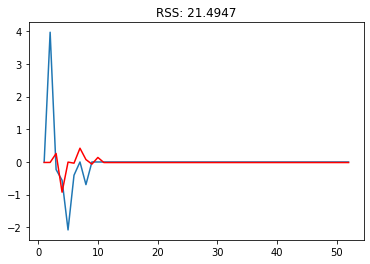

In [113]:
# Fitting the ARIMA Model and Plotting with one column w.r.t "Change"
AR_Model = ARIMA(combined_df_log['Change'], order=(2, 1, 0))  
results_AR = AR_Model.fit(disp=-1)  
plt.plot(ts_log_diff['Change'])
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff['Change'])**2))

Text(0.5, 1.0, 'RSS: 37.7232')

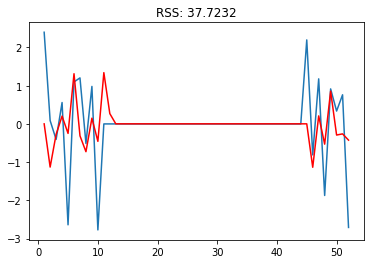

In [114]:
# Fitting the ARIMA Model and Plotting with one column w.r.t "URL"
AR_Model = ARIMA(combined_df_log['URL'], order=(2, 1, 0))  
results_AR = AR_Model.fit(disp=-1)  
plt.plot(ts_log_diff['URL'])
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff['URL'])**2))

# MA Model

Text(0.5, 1.0, 'RSS: nan')

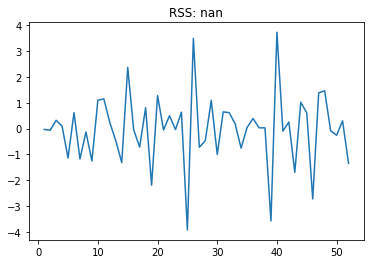

In [115]:
# Fitting the ARIMA Model and Plotting with one column w.r.t "Keywords"
MA_Model = ARIMA(combined_df_log['Keywords'], order=(0, 1, 2))  
results_MA = MA_Model.fit(disp=-1, start_params = (0,1))  
plt.plot(ts_log_diff['Keywords'])
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff['Keywords'])**2))

Text(0.5, 1.0, 'RSS: nan')

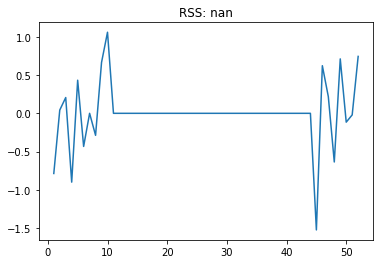

In [116]:
# Fitting the ARIMA Model and Plotting with one column w.r.t "Position"
MA_Model = ARIMA(combined_df_log['Position'], order=(0, 1, 2))  
results_MA = MA_Model.fit(disp=-1, start_params = (0,1,2))  
plt.plot(ts_log_diff['Position'])
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff['Position'])**2))

Text(0.5, 1.0, 'RSS: nan')

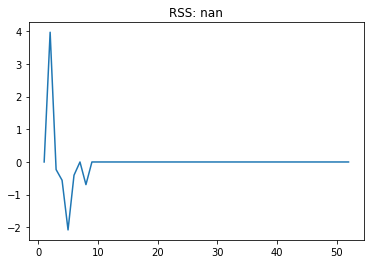

In [117]:
# Fitting the ARIMA Model and Plotting with one column w.r.t "Change"
MA_Model = ARIMA(combined_df_log['Change'], order=(0, 1, 2))  
results_MA = MA_Model.fit(disp=-1, start_params = (0,1,2))  
plt.plot(ts_log_diff['Change'])
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff['Change'])**2))

Text(0.5, 1.0, 'RSS: nan')

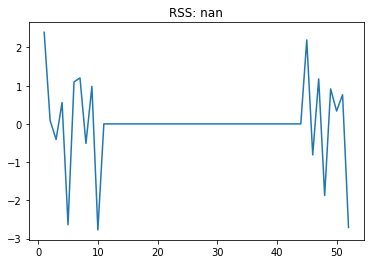

In [118]:
# Fitting the ARIMA Model and Plotting with one column w.r.t "URL"
MA_Model = ARIMA(combined_df_log['URL'], order=(0, 1, 2))  
results_MA = MA_Model.fit(disp=-1, start_params = (0,1,2))  
plt.plot(ts_log_diff['URL'])
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff['URL'])**2))

# Combined Model

Text(0.5, 1.0, 'RSS: 51.3178')

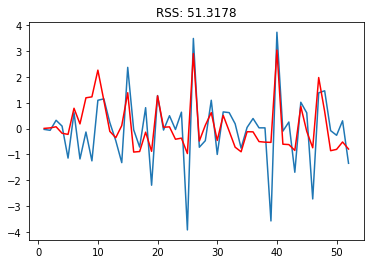

In [119]:
# Combining both Arima & Ma models w.r.t to one column 'Keywords'
CM_Model = ARIMA(combined_df_log['Keywords'], order=(2, 1, 1))  
results_ARIMA = CM_Model.fit(disp=-1)  
plt.plot(ts_log_diff['Keywords'])
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff['Keywords'])**2))

Text(0.5, 1.0, 'RSS: 6.6489')

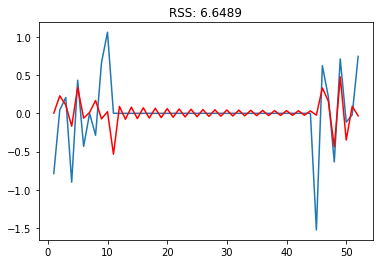

In [120]:
# Combining both Arima & Ma models w.r.t to one column 'Position'
CM_Model = ARIMA(combined_df_log['Position'], order=(2, 1, 1))  
results_ARIMA = CM_Model.fit(disp=-1)  
plt.plot(ts_log_diff['Position'])
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff['Position'])**2))

Text(0.5, 1.0, 'RSS: 21.0297')

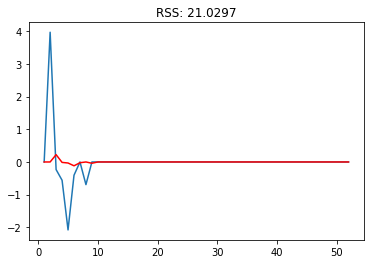

In [121]:
# Combining both Arima & Ma models w.r.t to one column 'Change'
CM_Model = ARIMA(combined_df_log['Change'], order=(2, 1, 1))  
results_ARIMA = CM_Model.fit(disp=-1)  
plt.plot(ts_log_diff['Change'])
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff['Change'])**2))

Text(0.5, 1.0, 'RSS: 35.8120')

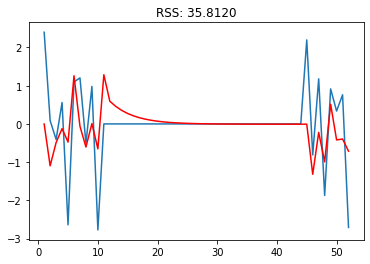

In [122]:
# Combining both Arima & Ma models w.r.t to one column 'URL'
CM_Model = ARIMA(combined_df_log['URL'], order=(2, 1, 1))  
results_ARIMA = CM_Model.fit(disp=-1)  
plt.plot(ts_log_diff['URL'])
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff['URL'])**2))

Here we can see that the AR and MA models have almost the same RSS but combined is significantly better. 